In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
results = np.genfromtxt('./widthdepthsweeps.csv', delimiter=',', dtype=None, names=True)
print(len(results), results.dtype)

482 [('layer_type', 'S33'), ('fp16', 'S4'), ('LR', '<f8'), ('d_model_encoder_embed_dim', '<i8'), ('d_ffn_encoder_ffn_embed_dim', '<i8'), ('n_heads_encoder_attention_heads', '<i8'), ('d_head_encoder_head_dim', '<i8'), ('n_layers_encoder_layers', '<i8'), ('d_model_decoder_embed_dim', '<i8'), ('d_ffn_decoder_ffn_embed_dim', '<i8'), ('n_heads_decoder_attention_heads', '<i8'), ('d_head_decoder_head_dim', '<i8'), ('n_layers_decoder_layers', '<i8'), ('Total_Params_formula_no_bias_or_LayerNorm_params', '<i8'), ('dropout', '<f8'), ('batch_size_maxtokens', '<i8'), ('trainable_params_fairseq_log', 'S11'), ('application_id', '<i8'), ('experiment', 'S8'), ('BEST_BLEU_VAL_EPOCH_10', '<f8'), ('BEST_BLEU_VAL_EPOCH_20', '<f8'), ('BEST_BLEU_VAL_EPOCH_30', '<f8'), ('BEST_BLEU_VAL_EPOCH_120', '<f8'), ('BEST_LOSS_VAL_EPOCH_10', '<f8'), ('BEST_LOSS_VAL_EPOCH_20', '<f8'), ('BEST_LOSS_VAL_EPOCH_30', '<f8'), ('BEST_LOSS_VAL_EPOCH_120', '<f8'), ('BEST_LOSS_TRAIN_EPOCH_10', '<f8'), ('BEST_LOSS_TRAIN_EPOCH_20', '

<ipython-input-3-678e8f97e454>:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  results = np.genfromtxt('./widthdepthsweeps.csv', delimiter=',', dtype=None, names=True)


Text(0.5, 1.0, 'best loss_train vs n_layers')

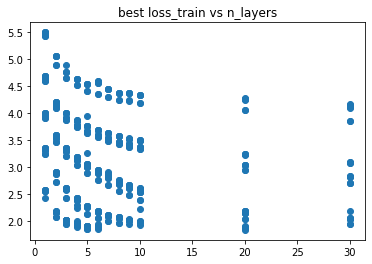

In [4]:
plt.scatter(results['n_layers_encoder_layers'], results['BEST_LOSS_TRAIN_EPOCH_1'])
plt.title('best loss_train vs n_layers')

Text(0.5, 1.0, 'Median train_wall vs n_layers')

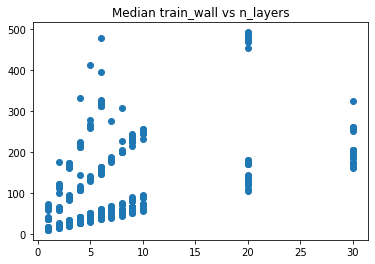

In [5]:
plt.scatter(results['n_layers_encoder_layers'], results['Median'])
plt.title('Median train_wall vs n_layers')

#### train_loss vs width

In [6]:
# We expect 106 baseline trials.
# width=2048: {1...6}
# width=1024: {1...10,20}
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 53 width-depth combos
# 53*2 runs per combo = 106 trials
baseline_results = results[results['layer_type'] == b'baseline']
print(len(baseline_results))

106


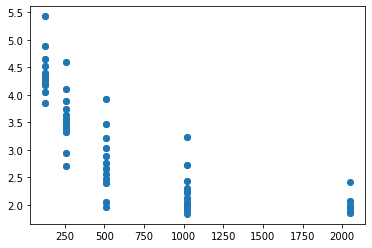

In [7]:
# all plotted w/o series separation...
plt.scatter(
    baseline_results['d_model_encoder_embed_dim'],
    baseline_results['BEST_LOSS_TRAIN_EPOCH_1'],
)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

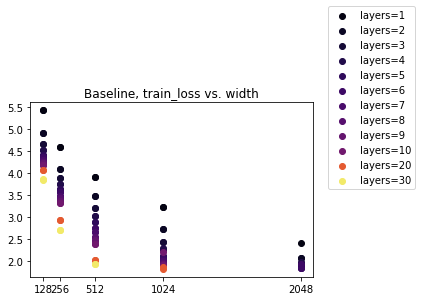

In [8]:
#split on layers
all_layers = np.unique(baseline_results['n_layers_encoder_layers'])
for layer in all_layers:
    layers_slice = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
    plt.scatter(
        layers_slice['d_model_encoder_embed_dim'],
        layers_slice['BEST_LOSS_TRAIN_EPOCH_1'],
        label='layers={}'.format(layer),
        c=cm.inferno.colors[layer*8]
    )

plt.title('Baseline, train_loss vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

In [9]:
# 5 different layer types
np.unique(results['layer_type'])

array([b'baseline', b'crs_--strategy_det_top_k__k_256',
       b'crs_--strategy_det_top_k__k_64',
       b'crs_--strategy_single_norm__k_256',
       b'crs_--strategy_single_norm__k_64'], dtype='|S33')

In [10]:
# We expect ??? crs_det_top_k_k_64.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 36 width-depth combos
# 36*2 runs per combo = 72 trials
det_top_k_k_64 = results[results['layer_type'] == b'crs_--strategy_det_top_k__k_64']
len(det_top_k_k_64)

106

In [11]:
# We expect ??? det_top_k_k_256.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {}
# total: 24 width-depth combos
# 24*2 runs per combo = 48 trials
det_top_k_k_256 = results[results['layer_type'] == b'crs_--strategy_det_top_k__k_256']
len(det_top_k_k_256)

82

In [12]:
# We expect ??? single_norm_k_64.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 36 width-depth combos
# 36*2 runs per combo = 72 trials
single_norm_k_64 = results[results['layer_type'] == b'crs_--strategy_single_norm__k_64']
len(single_norm_k_64)

106

In [13]:
# We expect ??? single_norm_k_256.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {}
# total: 24 width-depth combos
# 24*2 runs per combo = 48 trials
single_norm_k_256 = results[results['layer_type'] == b'crs_--strategy_single_norm__k_256']
len(single_norm_k_256)

82

<ipython-input-14-1326b84b9f1c>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


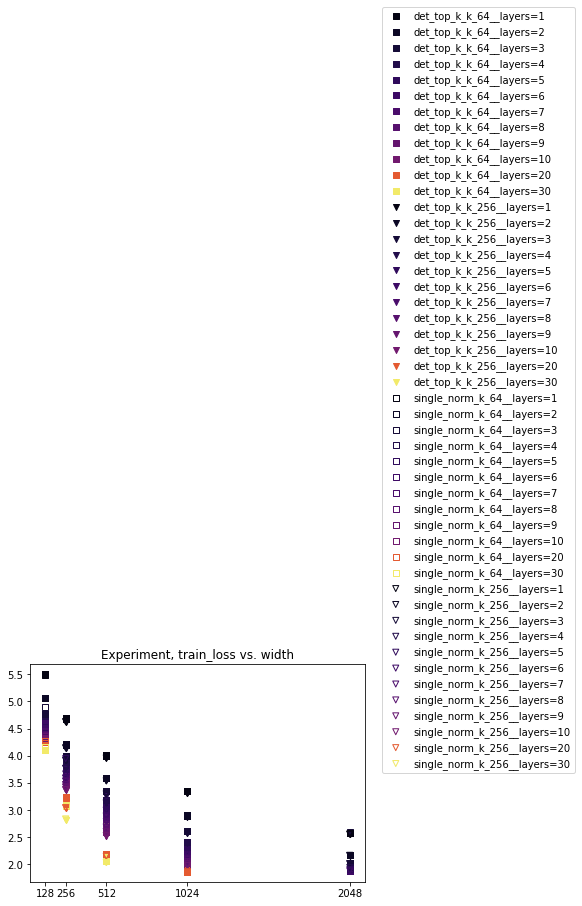

In [14]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        color = cm.inferno.colors[layer*8]
        plt.scatter(
            layers_slice['d_model_encoder_embed_dim'],
            layers_slice['BEST_LOSS_TRAIN_EPOCH_1'],
            label='{}__layers={}'.format(experiment_name, layer),
            marker='s' if 'k_64' in experiment_name else 'v',
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
        )

plt.title('Experiment, train_loss vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### train_loss vs n_layers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

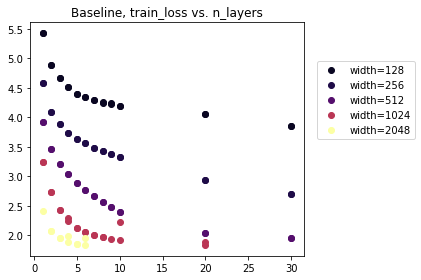

In [15]:
#split on width
all_widths = np.unique(baseline_results['d_model_encoder_embed_dim'])
max_width = max(all_widths)
for width in all_widths:
    width_slice = baseline_results[baseline_results['d_model_encoder_embed_dim'] == width]
    plt.scatter(
        width_slice['n_layers_encoder_layers'],
        width_slice['BEST_LOSS_TRAIN_EPOCH_1'],
        label='width={}'.format(width),
        c=cm.inferno.colors[int(width / max_width * 256) - 1]
    )

plt.title('Baseline, train_loss vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

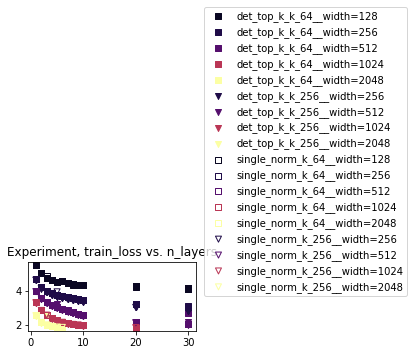

In [16]:
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    #split on width
    all_widths = np.unique(experiment['d_model_encoder_embed_dim'])
    max_width = max(all_widths)
    for width in all_widths:
        width_slice = experiment[experiment['d_model_encoder_embed_dim'] == width]
        color = cm.inferno.colors[int(width / max_width * 256) - 1]
        plt.scatter(
            width_slice['n_layers_encoder_layers'],
            width_slice['BEST_LOSS_TRAIN_EPOCH_1'],
            label='{}__width={}'.format(experiment_name, width),
            marker='s' if 'k_64' in experiment_name else 'v',
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
        )

plt.title('Experiment, train_loss vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### Baseline Median train_wall vs width

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

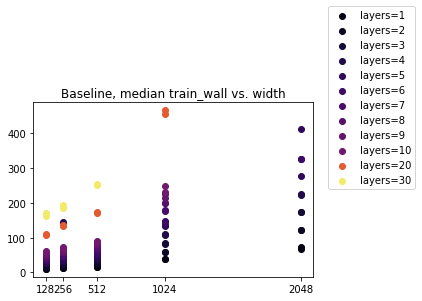

In [17]:
#split on layers
all_layers = np.unique(baseline_results['n_layers_encoder_layers'])
for layer in all_layers:
    layers_slice = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
    plt.scatter(
        layers_slice['d_model_encoder_embed_dim'],
        layers_slice['Median'],
        label='layers={}'.format(layer),
        c=cm.inferno.colors[layer*8]
    )

plt.title('Baseline, median train_wall vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

Runtime scales linearly with depth.
Tracing out the layers=1 curve, we can see the effect of increasing width.

<ipython-input-18-aeb08f06c73c>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


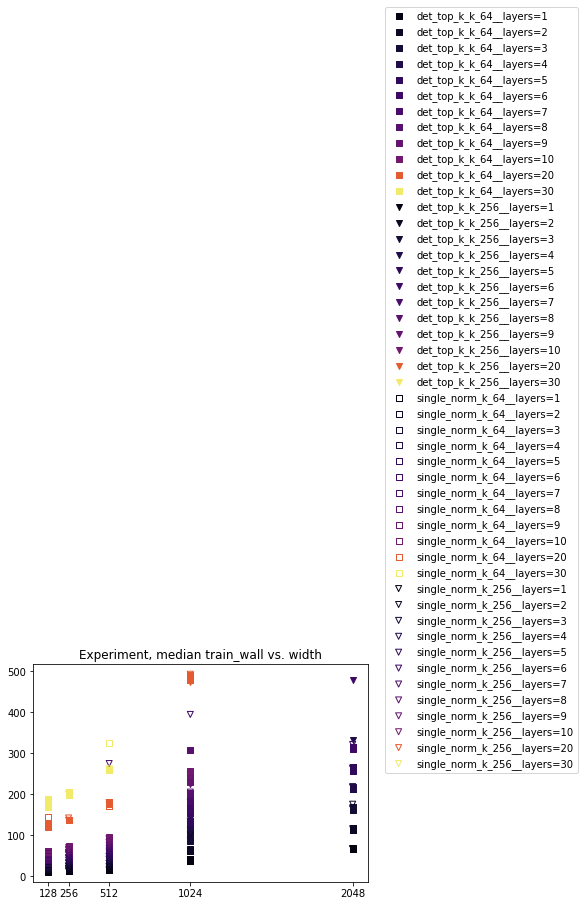

In [18]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    #split on layers
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        color = cm.inferno.colors[layer*8]
        plt.scatter(
            layers_slice['d_model_encoder_embed_dim'],
            layers_slice['Median'],
            label='{}__layers={}'.format(experiment_name, layer),
            marker='s' if 'k_64' in experiment_name else 'v',
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
        )

plt.title('Experiment, median train_wall vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### Baseline Median train_wall vs n_layers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

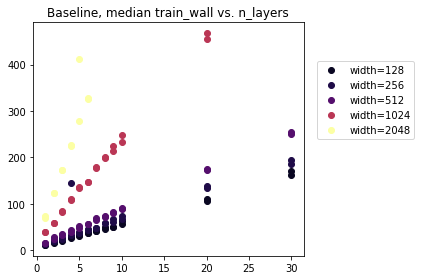

In [19]:
#split on width
all_widths = np.unique(baseline_results['d_model_encoder_embed_dim'])
max_width = max(all_widths)
for width in all_widths:
    width_slice = baseline_results[baseline_results['d_model_encoder_embed_dim'] == width]
    plt.scatter(
        width_slice['n_layers_encoder_layers'],
        width_slice['Median'],
        label='width={}'.format(width),
        c=cm.inferno.colors[int(width / max_width * 256) - 1]
    )

plt.title('Baseline, median train_wall vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

Can see the outlier at layers=4 width=256 that messes up baseline measurements.

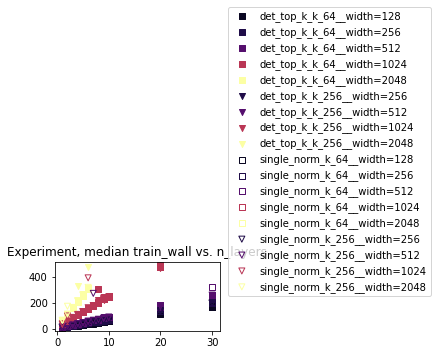

In [20]:
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    #split on width
    all_widths = np.unique(experiment['d_model_encoder_embed_dim'])
    max_width = max(all_widths)
    for width in all_widths:
        width_slice = experiment[experiment['d_model_encoder_embed_dim'] == width]
        color = cm.inferno.colors[int(width / max_width * 256) - 1]
        plt.scatter(
            width_slice['n_layers_encoder_layers'],
            width_slice['Median'],
            label='{}__width={}'.format(experiment_name, width),
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
            marker='s' if 'k_64' in experiment_name else 'v',
        )

plt.title('Experiment, median train_wall vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### Speedup vs. width

<ipython-input-21-dbe212ef4f3f>:67: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


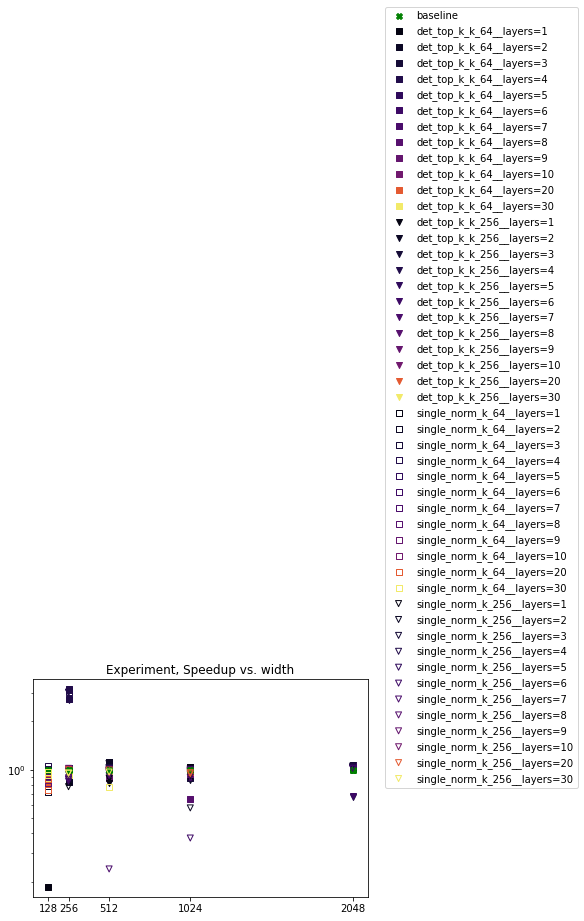

In [21]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
used_legend_names = {}
for experiment_name, experiment in experiments.items():
    #split on layers
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        
        all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline)
        for width in all_widths_baseline:
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
            train_wall_times = np.array([
                width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                width_slice_baseline['epoch_30'],
            ])
            # compute median across 2 trials, 5 measurements/trial
            flat_train_wall_times = train_wall_times.flatten()
            median_train_wall_time_baseline = np.median(flat_train_wall_times)
            # This is the 1x multiplier. Plot it.
            width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]            
            
            legend_name = 'baseline'
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['d_model_encoder_embed_dim'],
                [1 for i in range(len(width_slice_nonan))],
                label=legend_name,
                c='green',
                marker='X',
            )

            # ratio_vs_baseline = width_slice_nonan['Median'] / median_train_wall_time_baseline  # slowdown
            ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup
            
            color = cm.inferno.colors[layer*8]
            legend_name = '{}__layers={}'.format(experiment_name, layer)
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['d_model_encoder_embed_dim'],
                ratio_vs_baseline,
                label=legend_name,
                edgecolors=color,
                facecolors='none' if 'single' in experiment_name else color,
                marker='s' if 'k_64' in experiment_name else 'v',
            )

plt.title('Experiment, Speedup vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()
plt.yscale('log')

Speedup at layers=4 width=256 is an outlier caused by a bad baseline run, as discussed below.

#### Speedup vs n_layers

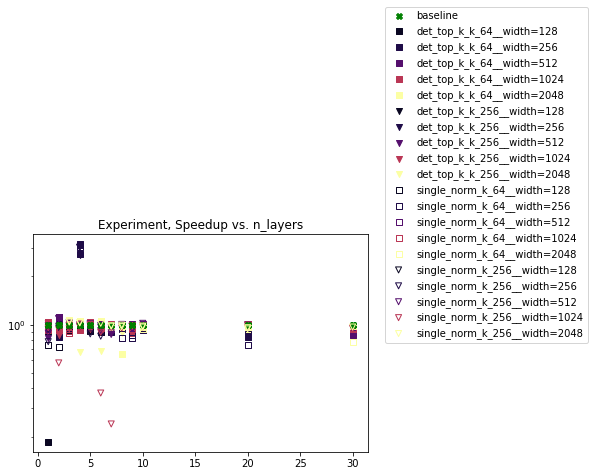

In [22]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
used_legend_names = {}
for experiment_name, experiment in experiments.items():
    #split on layers
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        
        all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline)
        for width in all_widths_baseline:
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
            train_wall_times = np.array([
                width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                width_slice_baseline['epoch_30'],
            ])
            # compute median across 2 trials, 5 measurements/trial
            flat_train_wall_times = train_wall_times.flatten()
            median_train_wall_time_baseline = np.median(flat_train_wall_times)
            # This is the 1x multiplier. Plot it.
            width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]

            legend_name = 'baseline'
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['n_layers_encoder_layers'],
                [1 for i in range(len(width_slice_nonan))],
                label=legend_name,
                c='green',
                marker='X',
            )
            
            # ratio_vs_baseline = width_slice_nonan['Median'] / median_train_wall_time_baseline  # slowdown
            ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup
            
            color = cm.inferno.colors[int(width / max_width_baseline * 256) - 1]
            legend_name = '{}__width={}'.format(experiment_name, width)
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['n_layers_encoder_layers'],
                ratio_vs_baseline,
                label=legend_name,
                edgecolors=color,
                facecolors='none' if 'single' in experiment_name else color,
                marker='s' if 'k_64' in experiment_name else 'v',
            )

plt.title('Experiment, Speedup vs. n_layers')
plt.legend(loc=(1.05, 0.5))
# plt.tight_layout()
plt.yscale('log')

### train_loss baseline heatmap (width and depth)

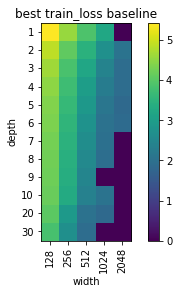

In [23]:
# We expect 106 baseline trials.
# width=2048: {1...6}
# width=1024: {1...10,20}
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 53 width-depth combos
# 53*2 runs per combo = 106 trials

all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
all_widths_baseline = np.unique(baseline_results['d_model_encoder_embed_dim'])

all_train_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))

for layer_idx, layer in enumerate(all_layers):  # depth
    layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]

    all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
    max_width_baseline = max(all_widths_baseline_)
    for width_idx, width in enumerate(all_widths_baseline_):  # width
        width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
        
        all_train_losses[layer_idx, width_idx] = np.mean(width_slice_baseline['BEST_LOSS_TRAIN_EPOCH_1'])

np.nan_to_num(all_train_losses, copy=False)

plt.imshow(all_train_losses)
plt.title('best train_loss baseline')
plt.xlabel('width')
plt.xticks(ticks=range(len(all_widths_baseline)), labels=all_widths_baseline, rotation=90)
plt.ylabel('depth')
plt.yticks(ticks=range(len(all_layers_baseline)), labels=all_layers_baseline)
plt.colorbar()

(<matplotlib.image.AxesImage at 0x11c665550>,
 array([[4.62699986, 3.95749998, 3.31050003, 2.55550003],
        [4.14499998, 3.53750002, 0.        , 2.1645    ],
        [3.91599989, 3.29699993, 2.58249998, 2.01200008],
        [3.76799989, 3.13100004, 2.38750005, 0.        ],
        [3.80649996, 2.99799991, 2.25399995, 0.        ],
        [3.58850002, 2.89050007, 2.16899991, 0.        ],
        [3.53349996, 0.        , 2.0940001 , 0.        ],
        [3.46949995, 2.6875    , 2.04850006, 0.        ],
        [3.42449999, 2.60650003, 2.00999999, 0.        ],
        [3.37599993, 2.52999997, 0.        , 0.        ],
        [3.0424999 , 2.14950001, 1.86049998, 0.        ],
        [2.83300006, 2.03349996, 0.        , 0.        ]]))

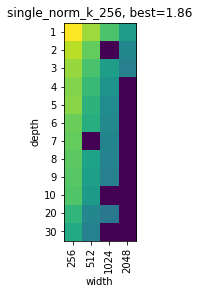

In [24]:
def make_heatmap(baseline_results, ax, title='', field='BEST_LOSS_TRAIN_EPOCH_1', vmin=None, vmax=None, function=np.min):
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(baseline_results['d_model_encoder_embed_dim'])

    all_train_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]

        all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline_)
        for width_idx, width in enumerate(all_widths_baseline_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

            all_train_losses[layer_idx, width_idx] = np.mean(width_slice_baseline[field])

    np.nan_to_num(all_train_losses, copy=False)

    imgresult = ax.imshow(all_train_losses, vmin=vmin, vmax=vmax)
    title += ', best={:0.2f}'.format(function(all_train_losses[all_train_losses != 0]))
    try:
        ax.set_title(title)
        ax.set_xticks(ticks=range(len(all_widths_baseline)))
        ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
        ax.set_yticks(ticks=range(len(all_layers_baseline)))
        ax.set_yticklabels(labels=all_layers_baseline, rotation=90)
    except:
        ax.title(title)
        ax.xticks(ticks=range(len(all_widths_baseline)), labels=all_widths_baseline, rotation=90)
        ax.yticks(ticks=range(len(all_layers_baseline)), labels=all_layers_baseline)
        ax.xlabel('width')
        ax.ylabel('depth')
    return imgresult, all_train_losses
    
make_heatmap(single_norm_k_256, plt, title='single_norm_k_256')

In [25]:
def get_normalizing_values(field='BEST_LOSS_TRAIN_EPOCH_1'):
    # Get normalizing constants across all datasets.
    # Used to standardize the colormap scales.
    datasets = [
        baseline_results,
        det_top_k_k_64,
        det_top_k_k_256,
        single_norm_k_64,
        single_norm_k_256,
    ]

    vmin = np.inf
    vmax = 0

    for dataset in datasets:        
        cleaned = np.nan_to_num(dataset[field])
        min_value = np.min(cleaned)
        max_value = np.max(cleaned)
        if max_value > vmax:
            vmax = max_value
        if min_value < vmin:
            vmin = min_value

    return vmin, vmax

0.0 5.500999928


Text(0.5, 1.0, 'colorbar')

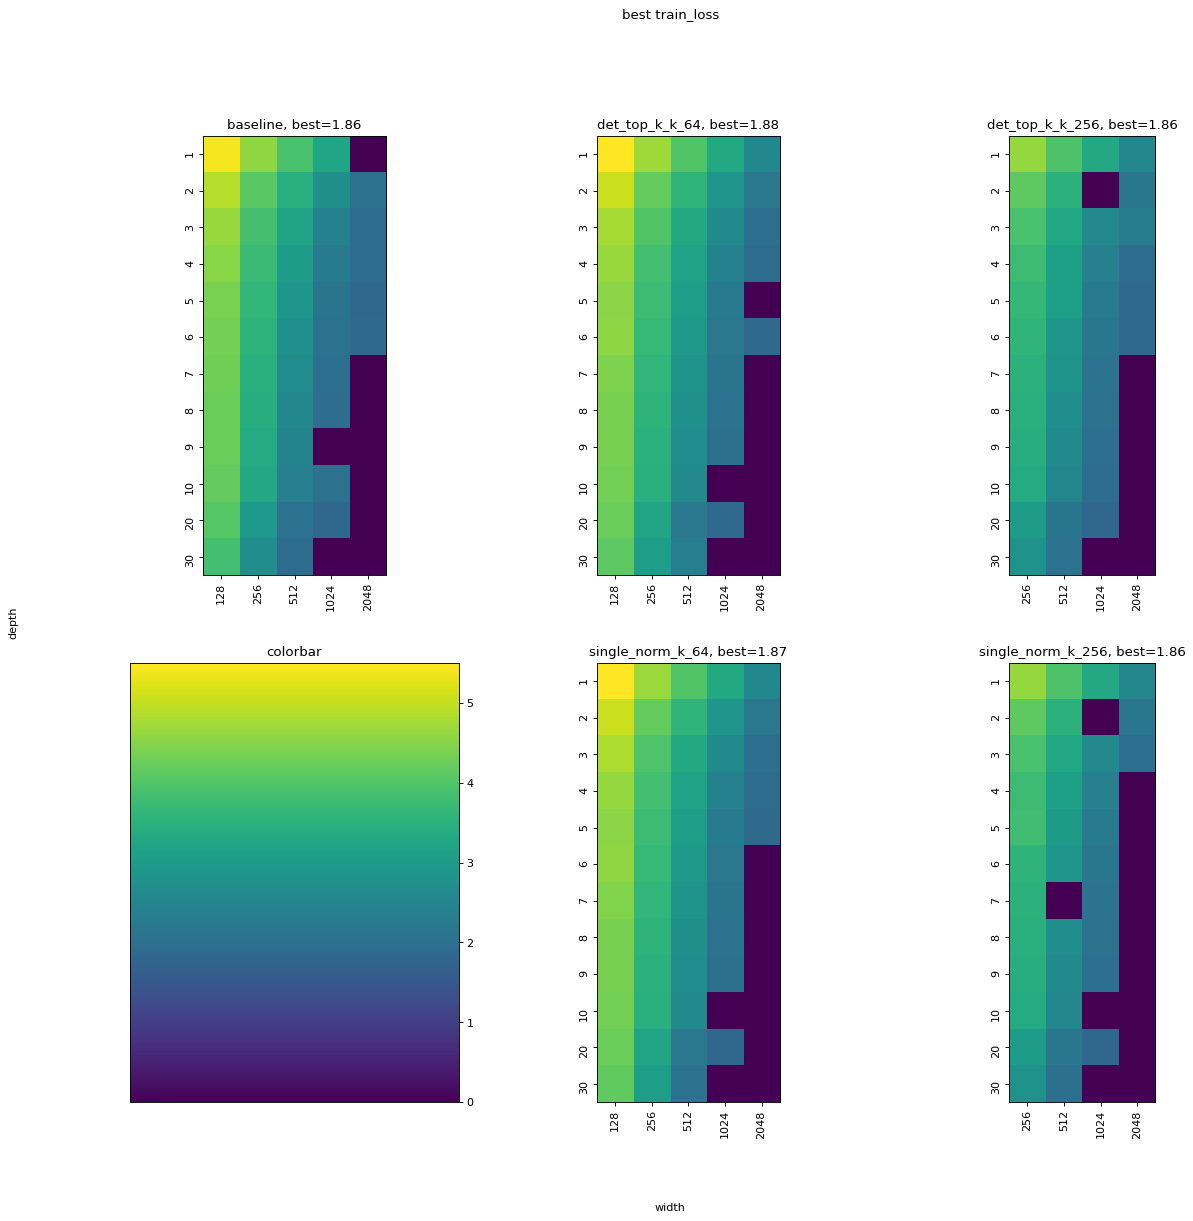

In [26]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('best train_loss')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

0.0 5.214000225


Text(0.5, 1.0, 'colorbar')

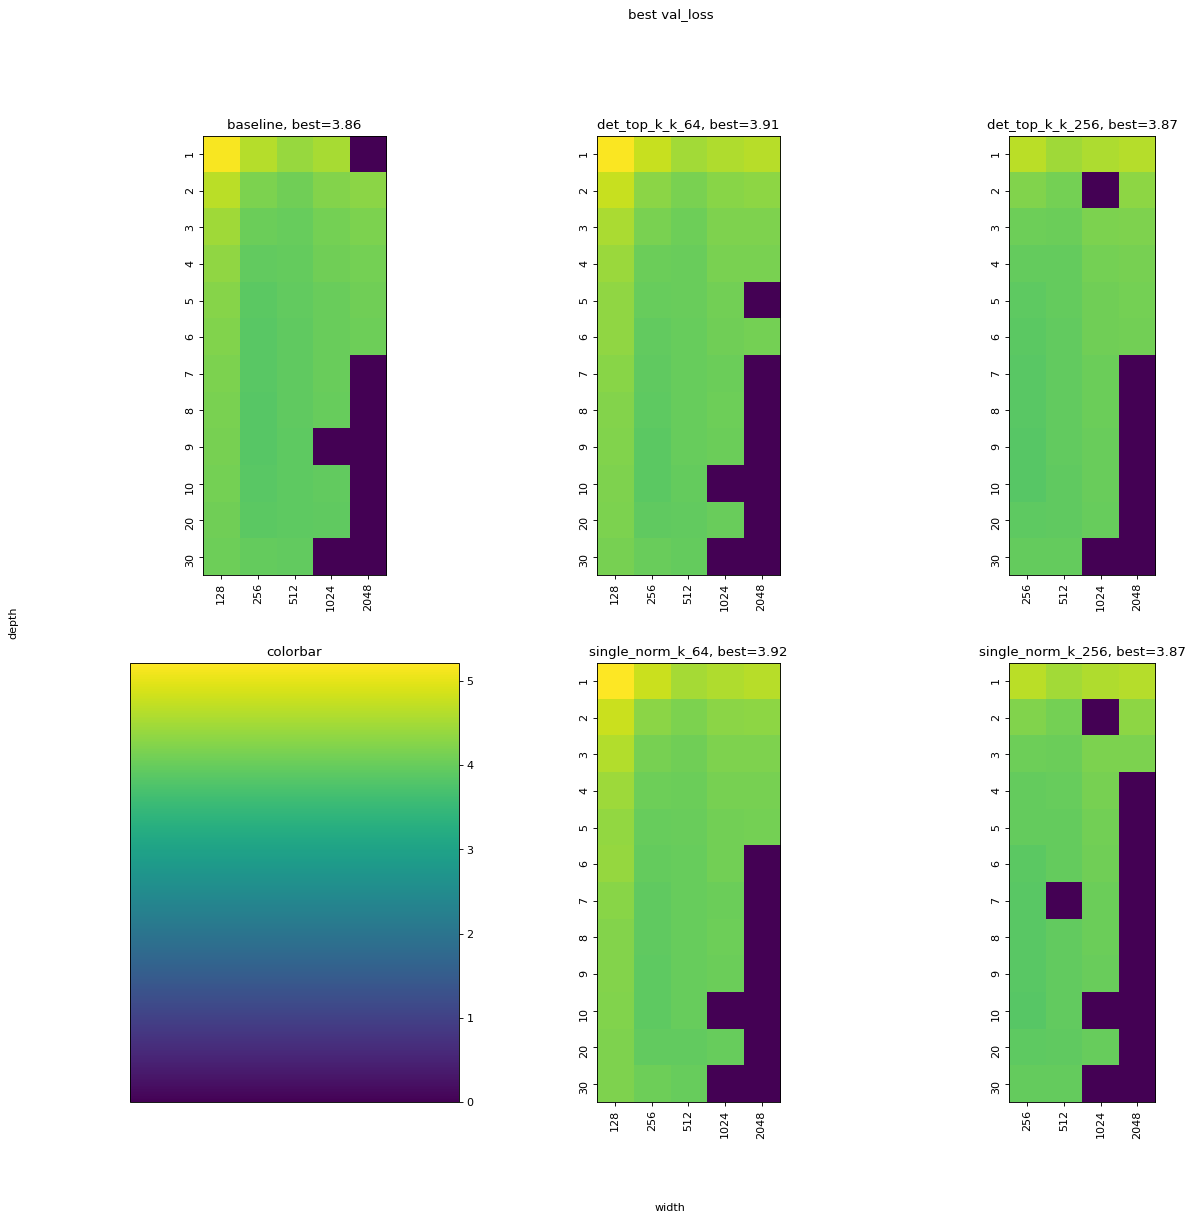

In [27]:
field = 'BEST_LOSS_VAL_EPOCH_120'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('best val_loss')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

best excluding width=256 on k=256.
also best score width/depth combo.

0.0 35.09999847


Text(0.5, 1.0, 'colorbar')

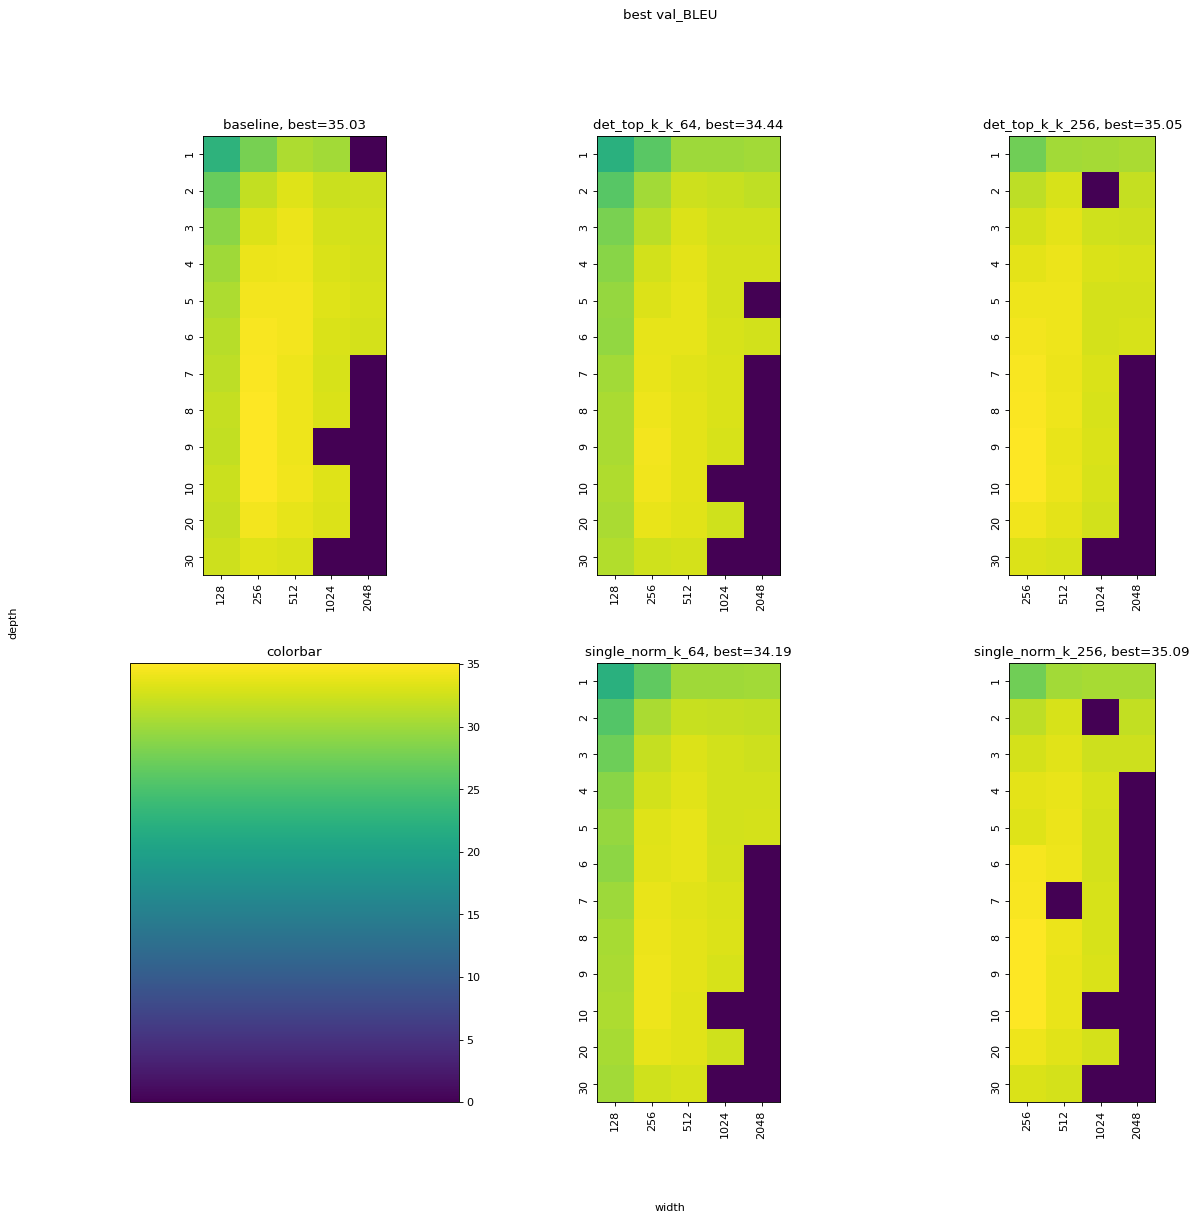

In [28]:
field = 'BEST_BLEU_VAL_EPOCH_120'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax, function=np.max)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax, function=np.max)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax, function=np.max)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax, function=np.max)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax, function=np.max)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('best val_BLEU')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

How can I capture the diagonal relationship?

How to avoid 2D param search:
Setting WIDTH is more important than setting DEPTH. There are typically noticable changes in validation model performance vs depth. If WIDTH is not set correctly, then you're unlikely to get close to the maximum performance by tuning depth only.
First sweep across WIDTH, fixing DEPTH to a 'reasonable' value for a similar task.
Once the best WIDTH value is established, sweep across DEPTH.

Square/sqrt relationship somehow?

#### Param Count Contours

In [29]:
# missing 7 depth-width combinations. add them here...
missing_combos = [  # (width, depth, param_count)
    (1024, 30, 644997120),
    (2048, 7, 618905600),
    (2048, 8, 702791680),
    (2048, 9, 786677760),
    (2048, 10, 870563840),
    (2048, 20, 1709424640),
    (2048, 30, 2548285440),
]

tmp = baseline_results.copy()
for width, depth, param_count in missing_combos:
    tmp = np.append(tmp, tmp[0])
    tmp[-1]['d_model_encoder_embed_dim'] = width
    tmp[-1]['n_layers_encoder_layers'] = depth
    tmp[-1]['Total_Params_formula_no_bias_or_LayerNorm_params'] = param_count

print(tmp[len(tmp) - len(missing_combos):]['d_model_encoder_embed_dim'])
print(tmp[len(tmp) - len(missing_combos):]['n_layers_encoder_layers'])
print(tmp[len(tmp) - len(missing_combos):]['Total_Params_formula_no_bias_or_LayerNorm_params'])

baseline_results_with_all_param_count_combos = tmp

print(len(baseline_results_with_all_param_count_combos))

[1024 2048 2048 2048 2048 2048 2048]
[30  7  8  9 10 20 30]
[ 644997120  618905600  702791680  786677760  870563840 1709424640
 2548285440]
113


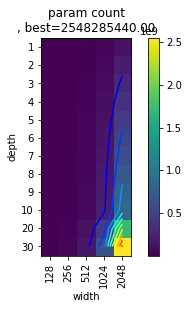

In [30]:
_, all_train_losses = make_heatmap(baseline_results_with_all_param_count_combos, ax=plt, title='param count\n', field='Total_Params_formula_no_bias_or_LayerNorm_params', function=np.max)
plt.colorbar()
plt.contour(all_train_losses, cmap='jet', levels=10)

#### Log Param Count Heatmap

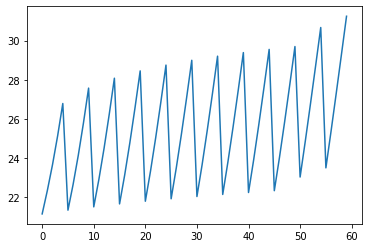

In [31]:
# plt.plot(all_train_losses.flatten())
log_param_count = np.log2(all_train_losses.flatten())
# log_param_count[log_param_count < 0] = 10  # set to a low value  # not necessary since we filled in the extra cells.
plt.plot(log_param_count)

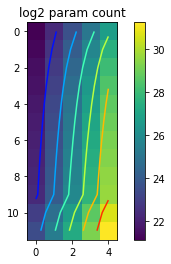

In [32]:
log_param_count = log_param_count.reshape(all_train_losses.shape)
plt.imshow(log_param_count)
plt.title('log2 param count')
plt.colorbar()
plt.contour(log_param_count, cmap='jet') # , levels=20

#### Median train_wall heatmap

0.0 492.281


Text(0.5, 1.0, 'colorbar')

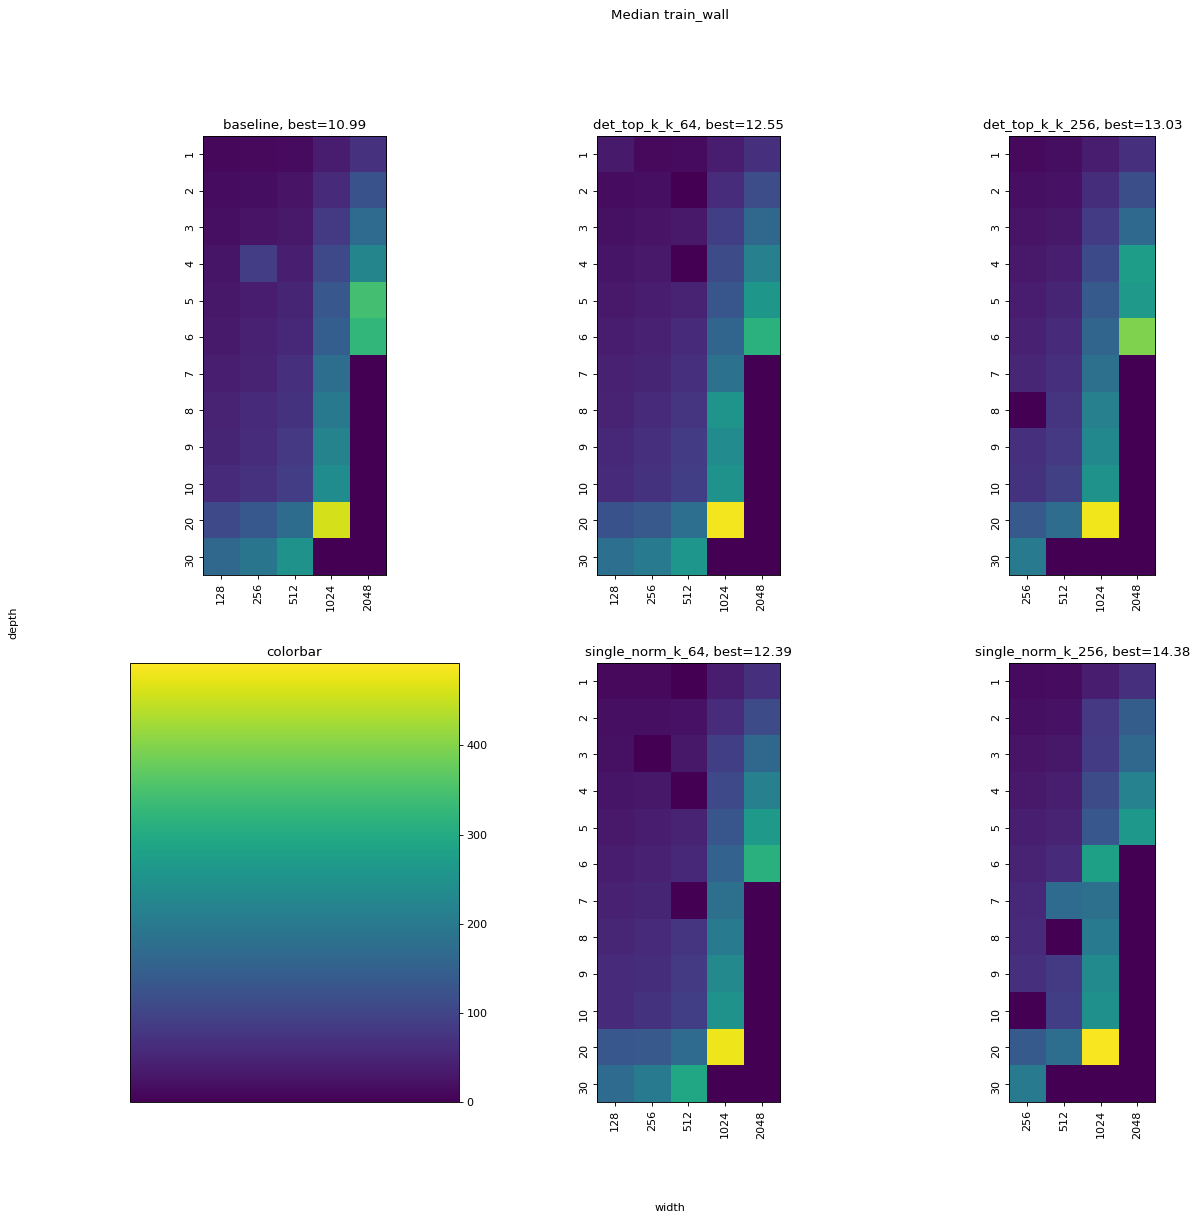

In [33]:
field = 'Median'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('Median train_wall')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

#### Speedup heatmap

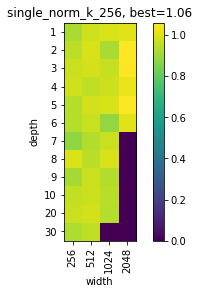

In [34]:
def make_speedup_heatmap(baseline_results, experiment_results, ax, title='', vmin=None, vmax=None, filter_outlying_baselines=False, function=np.max):
    all_layers = np.unique(experiment_results['n_layers_encoder_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    all_widths_experiment = np.unique(experiment_results['d_model_encoder_embed_dim'])

    all_train_losses = np.zeros((len(all_layers), len(all_widths_experiment)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
        layers_slice = experiment_results[experiment_results['n_layers_encoder_layers'] == layer]

        all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        all_widths_experiment_ = np.unique(layers_slice['d_model_encoder_embed_dim'])
        for width_idx, width in enumerate(all_widths_experiment_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
            width_slice_experiment = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            
            train_wall_times = np.array([
                width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                width_slice_baseline['epoch_30'],
            ])
            # compute median across 2 trials, 5 measurements/trial
            flat_train_wall_times_ = train_wall_times.flatten()  # filter out nan valeus.
            flat_train_wall_times = flat_train_wall_times_[~np.isnan(flat_train_wall_times_)]
            median_train_wall_time_baseline = np.median(flat_train_wall_times)
            if filter_outlying_baselines and np.any(median_train_wall_time_baseline * 2. > np.min(width_slice_baseline['Median'])):
                # if the computed baseline is 2x greater than the min-median of the runs
                # then just reassign the baseline value.
                median_train_wall_time_baseline = np.min(width_slice_baseline['Median'])
            # This is the 1x multiplier.
            
            # grab the experiment median runtime
            width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]
            
            ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup

            all_train_losses[layer_idx, width_idx] = np.max(ratio_vs_baseline) if len(ratio_vs_baseline) > 0 else 0

    np.nan_to_num(all_train_losses, copy=False)

    imgresult = ax.imshow(all_train_losses, vmin=vmin, vmax=vmax)
    title += ', best={:0.2f}'.format(function(all_train_losses[all_train_losses != 0]))
    try:
        ax.set_title(title)
        ax.set_xticks(ticks=range(len(all_widths_experiment)))
        ax.set_xticklabels(labels=all_widths_experiment, rotation=90)
        ax.set_yticks(ticks=range(len(all_layers)))
        ax.set_yticklabels(labels=all_layers, rotation=90)
    except:
        ax.title(title)
        ax.xticks(ticks=range(len(all_widths_experiment)), labels=all_widths_experiment, rotation=90)
        ax.yticks(ticks=range(len(all_layers)), labels=all_layers)
        ax.xlabel('width')
        ax.ylabel('depth')
    return imgresult, all_train_losses

make_speedup_heatmap(baseline_results, single_norm_k_256, plt, title='single_norm_k_256', filter_outlying_baselines=True)
plt.colorbar()

0 2
1.0595152905066947


Text(0.5, 1.0, 'colorbar')

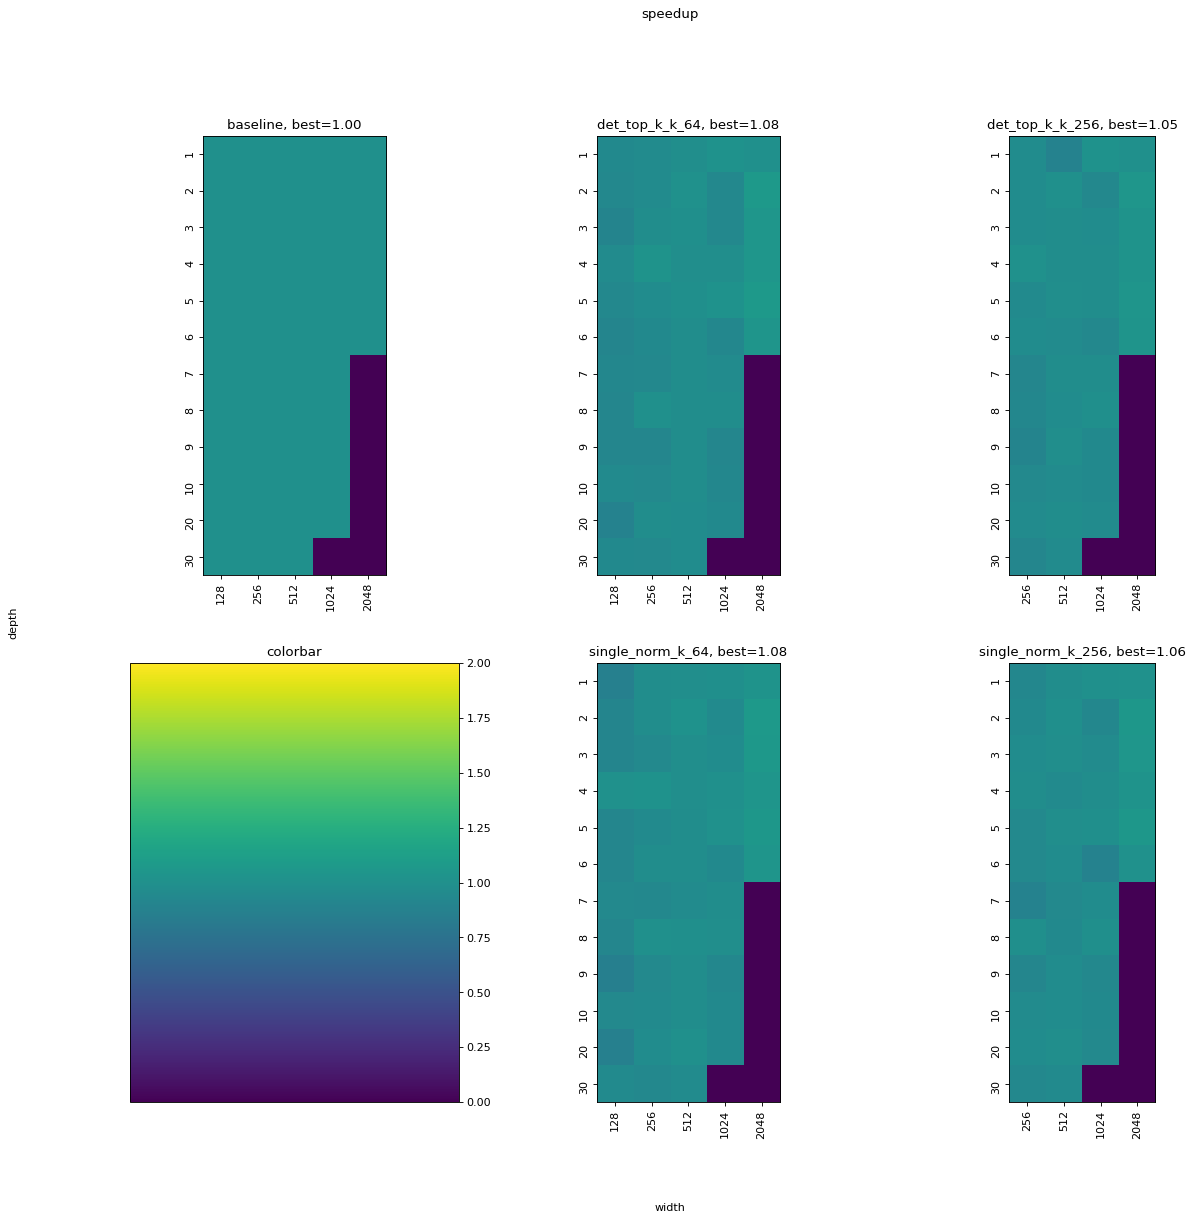

In [35]:
# field = 'Median'
# vmin, vmax = get_normalizing_values(field)
# Measuring min and max of derived quantity speedup, not of an existing field.
# set vmax to 3.5 (max current speedup)
vmin, vmax = 0, 2
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_speedup_heatmap(baseline_results, baseline_results, all_ax[0,0], title='baseline', vmin=vmin, vmax=vmax, filter_outlying_baselines=True)
result = make_speedup_heatmap(baseline_results, det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', vmin=vmin, vmax=vmax, filter_outlying_baselines=True)
result = make_speedup_heatmap(baseline_results, det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', vmin=vmin, vmax=vmax, filter_outlying_baselines=True)
result = make_speedup_heatmap(baseline_results, single_norm_k_64, all_ax[1,1], title='single_norm_k_64', vmin=vmin, vmax=vmax, filter_outlying_baselines=True)
result = make_speedup_heatmap(baseline_results, single_norm_k_256, all_ax[1,2], title='single_norm_k_256', vmin=vmin, vmax=vmax, filter_outlying_baselines=True)
print(np.max(result[1]))

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('speedup')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

[1.06111204 1.09886124 3.09734418]
[1.07652017 1.11151877 3.17783903]
[1.0649932  1.10412341 3.12294524]
[1.08858752 1.12190501 3.15241711]
[1.0677223  1.09516604 3.04793341]
3.0479334098737083


Text(0.5, 1.0, 'colorbar')

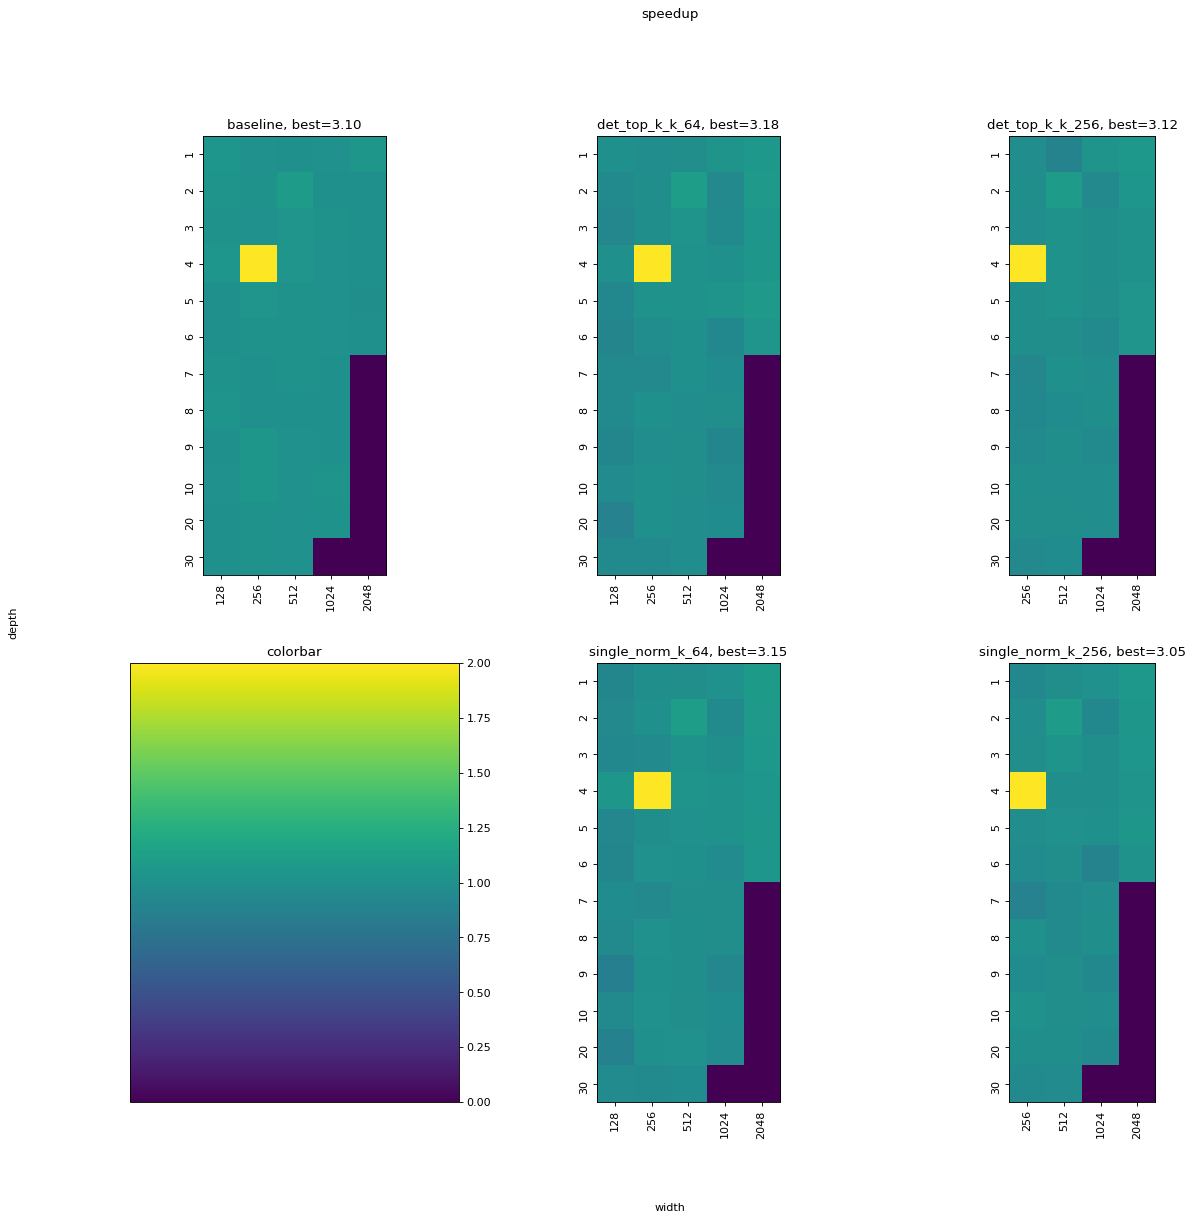

In [36]:
# field = 'Median'
# vmin, vmax = get_normalizing_values(field)
# Measuring min and max of derived quantity speedup, not of an existing field.
# set vmax to 3.5 (max current speedup)
vmin, vmax = 0, 2
# print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_speedup_heatmap(baseline_results, baseline_results, all_ax[0,0], title='baseline', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_speedup_heatmap(baseline_results, det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_speedup_heatmap(baseline_results, det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_speedup_heatmap(baseline_results, single_norm_k_64, all_ax[1,1], title='single_norm_k_64', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_speedup_heatmap(baseline_results, single_norm_k_256, all_ax[1,2], title='single_norm_k_256', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
print(np.max(result[1]))

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('speedup')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

Unusual behavior at width=256, depth=4. Why are we getting speedups even in the baseline? 
Because the baseline had 1 very slow run which threw off the results. 
Runtimes:

33.51	31.823	62.162	32.143	32.573	32.57

157.369	149.788	143.877	139.599	145.496	145.50

That run is an outlier. Confirmed by checking the data.

Can set `filter_outlying_baselines=True` to filter out baseline results that are 2x different than the median of all train_wall times of that experiment type. (smooths out baseline results).

Why does single_norm k=256 show a bigger speedup at layers=20 than layers=30, even though in layers=30, we expect that the transformer layers dominate in runtime? Why is the behavior not smooth?
why do we see similar speedups regardless of width at layers=10,20,30?
Why is the speedup in single_norm k=256 for layers=20 > speedup for single_norm k=64 layers=20? I'd expect there to be lesser speedup as k increases.

Why is single_norm_k_256 width=256 showing speedups over baseline? Still don't understand.

#### Full Table plots (with seaborn)

In [38]:
import seaborn as sns

[[b'0.94,-0.43' b'0.99,-0.60' b'1.02,0.23' b'1.07,-0.23']
 [b'0.98,-0.36' b'1.10,-0.34' b'0.93,-0.05' b'1.06,-0.54']
 [b'0.99,-0.40' b'1.03,-0.40' b'0.99,-0.37' b'1.05,-0.21']
 [b'3.05,-0.34' b'1.00,-0.22' b'0.99,-0.09' b'1.03,-0.12']
 [b'0.98,-0.29' b'1.01,-0.37' b'1.01,-0.47' b'1.06,-0.25']
 [b'0.97,-0.20' b'0.99,-0.23' b'0.90,-0.18' b'1.02,0.12']
 [b'0.89,-0.18' b'0.96,-0.22' b'0.98,0.12' b'0.00,0.00']
 [b'1.00,0.11' b'0.95,-0.15' b'0.99,0.02' b'0.00,0.00']
 [b'0.97,-0.01' b'0.98,-0.29' b'0.94,-0.01' b'0.00,0.00']
 [b'1.02,0.05' b'0.99,-0.34' b'0.98,-0.38' b'0.00,0.00']
 [b'1.00,-0.20' b'1.00,-0.27' b'0.96,-0.26' b'0.00,0.00']
 [b'0.95,-0.14' b'0.97,-0.24' b'0.00,0.00' b'0.00,0.00']]
speedup,improvement_in_bleu


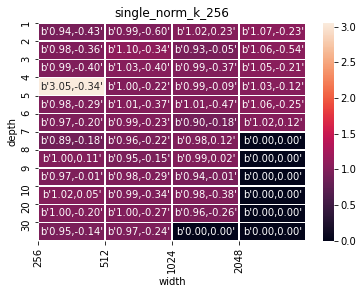

In [39]:
def make_speedup_heatmap(baseline_results, experiment_results, ax, title='', vmin=None, vmax=None, seaborn=True):
    all_layers = np.unique(experiment_results['n_layers_encoder_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    all_widths_experiment = np.unique(experiment_results['d_model_encoder_embed_dim'])

    all_train_losses = np.zeros((len(all_layers), len(all_widths_experiment)))
    all_train_bleu_diffs = np.zeros((len(all_layers), len(all_widths_experiment)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
        layers_slice = experiment_results[experiment_results['n_layers_encoder_layers'] == layer]

        all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        all_widths_experiment_ = np.unique(layers_slice['d_model_encoder_embed_dim'])
        for width_idx, width in enumerate(all_widths_experiment_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
            width_slice_experiment = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            
            train_wall_times = np.array([
                width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                width_slice_baseline['epoch_30'],
            ])
            # compute median across 2 trials, 5 measurements/trial
            flat_train_wall_times_ = train_wall_times.flatten()  # filter out nan valeus.
            flat_train_wall_times = flat_train_wall_times_[~np.isnan(flat_train_wall_times_)]
            median_train_wall_time_baseline = np.median(flat_train_wall_times)
            # This is the 1x multiplier.
            
            # grab the experiment median runtime
            width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]
            
            ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup

            all_train_losses[layer_idx, width_idx] = np.max(ratio_vs_baseline) if len(ratio_vs_baseline) > 0 else 0
            
            # grab experiment bleu 
            experiment_bleu = width_slice[~np.isnan(width_slice['BEST_BLEU_VAL_EPOCH_120'])]['BEST_BLEU_VAL_EPOCH_120']
            baseline_bleu = width_slice_baseline[~np.isnan(width_slice_baseline['BEST_BLEU_VAL_EPOCH_120'])]['BEST_BLEU_VAL_EPOCH_120']
            bleu_improvement = experiment_bleu - baseline_bleu  # neg. value is regression, pos. value is improvement
            all_train_bleu_diffs[layer_idx, width_idx] = np.max(bleu_improvement)

    np.nan_to_num(all_train_losses, copy=False)
    annot_arr = np.empty(all_train_losses.shape, dtype='|S20')
    for row_idx in range(annot_arr.shape[0]):
        for col_idx in range(annot_arr.shape[1]):
            annot_arr[row_idx, col_idx] = '{:.2f},{:.2f}'.format(all_train_losses[row_idx, col_idx], all_train_bleu_diffs[row_idx, col_idx])

    print(annot_arr)
    if not seaborn:
        imgresult = ax.imshow(all_train_losses, vmin=vmin, vmax=vmax)
    else:
        # imgresult = sns.heatmap(all_train_losses, vmin=vmin, vmax=vmax, annot=True, linewidths=.5)
        imgresult = sns.heatmap(all_train_losses, vmin=vmin, vmax=vmax, annot=annot_arr, fmt='s', linewidths=.5)
    try:
        ax.set_title(title)
        ax.set_xticks(ticks=range(len(all_widths_experiment)))
        ax.set_xticklabels(labels=all_widths_experiment, rotation=90)
        ax.set_yticks(ticks=range(len(all_layers)))
        ax.set_yticklabels(labels=all_layers, rotation=90)
    except:
        ax.title(title)
        ax.xticks(ticks=range(len(all_widths_experiment)), labels=all_widths_experiment, rotation=90)
        ax.yticks(ticks=range(len(all_layers)), labels=all_layers)
        ax.xlabel('width')
        ax.ylabel('depth')
    return imgresult, all_train_losses

make_speedup_heatmap(baseline_results, single_norm_k_256, plt, title='single_norm_k_256', seaborn=True)
print('speedup,improvement_in_bleu')

[[b'0.94,-0.43' b'0.99,-0.60' b'1.02,0.23' b'1.07,-0.23']
 [b'0.98,-0.36' b'1.10,-0.34' b'0.93,-0.05' b'1.06,-0.54']
 [b'0.99,-0.40' b'1.03,-0.40' b'0.99,-0.37' b'1.05,-0.21']
 [b'3.05,-0.34' b'1.00,-0.22' b'0.99,-0.09' b'1.03,-0.12']
 [b'0.98,-0.29' b'1.01,-0.37' b'1.01,-0.47' b'1.06,-0.25']
 [b'0.97,-0.20' b'0.99,-0.23' b'0.90,-0.18' b'1.02,0.12']
 [b'0.89,-0.18' b'0.96,-0.22' b'0.98,0.12' b'0.00,0.00']
 [b'1.00,0.11' b'0.95,-0.15' b'0.99,0.02' b'0.00,0.00']
 [b'0.97,-0.01' b'0.98,-0.29' b'0.94,-0.01' b'0.00,0.00']
 [b'1.02,0.05' b'0.99,-0.34' b'0.98,-0.38' b'0.00,0.00']
 [b'1.00,-0.20' b'1.00,-0.27' b'0.96,-0.26' b'0.00,0.00']
 [b'0.95,-0.14' b'0.97,-0.24' b'0.00,0.00' b'0.00,0.00']]
speedup,improvement_in_bleu


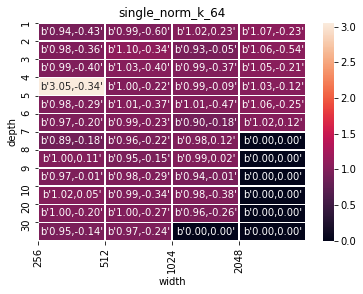

In [40]:
make_speedup_heatmap(baseline_results, single_norm_k_256, plt, title='single_norm_k_64', seaborn=True)
print('speedup,improvement_in_bleu')

[[b'1.05,0.00' b'1.01,0.00' b'1.00,0.00' b'1.01,0.00' b'1.06,0.00']
 [b'1.03,0.00' b'1.03,0.00' b'1.10,0.00' b'1.01,0.00' b'1.00,0.00']
 [b'1.03,0.00' b'1.01,0.00' b'1.04,0.00' b'1.03,0.00' b'1.00,0.00']
 [b'1.05,0.00' b'3.10,0.00' b'1.04,0.00' b'1.02,0.00' b'1.00,0.00']
 [b'1.00,0.00' b'1.04,0.00' b'1.03,0.00' b'1.01,0.00' b'1.00,0.00']
 [b'1.00,0.00' b'1.03,0.00' b'1.02,0.00' b'1.01,0.00' b'1.01,0.00']
 [b'1.03,0.00' b'1.01,0.00' b'1.02,0.00' b'1.01,0.00' b'0.00,0.00']
 [b'1.04,0.00' b'1.00,0.00' b'1.00,0.00' b'1.00,0.00' b'0.00,0.00']
 [b'1.00,0.00' b'1.06,0.00' b'1.01,0.00' b'1.00,0.00' b'0.00,0.00']
 [b'1.01,0.00' b'1.06,0.00' b'1.01,0.00' b'1.03,0.00' b'0.00,0.00']
 [b'1.00,0.00' b'1.02,0.00' b'1.01,0.00' b'1.02,0.00' b'0.00,0.00']
 [b'1.00,0.00' b'1.02,0.00' b'1.01,0.00' b'0.00,0.00' b'0.00,0.00']]
speedup,improvement_in_bleu


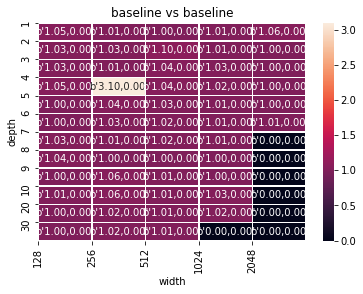

In [41]:
# A plot just to verify things are working as expected.
make_speedup_heatmap(baseline_results, baseline_results, plt, title='baseline vs baseline', seaborn=True)
print('speedup,improvement_in_bleu')

How much more speedup will we get if we do decoder models also? 
Can we replicate these results if we do single_norm experiments 20x times?
Why is there such non-smooth behaviors?
Is this much speedup possible by changing only FC in the layers we have?
Should I try this method in WMT?

#### {field} vs depth, multiple width curves
Width-Depth Analysis

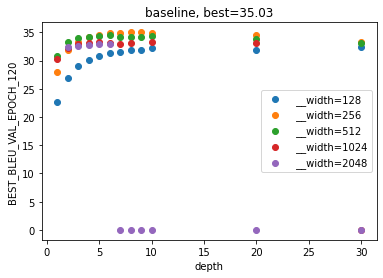

In [42]:
def make_curves(baseline_results, ax, title='', field='BEST_LOSS_TRAIN_EPOCH_1', function=np.min, experiment_name=' '):
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(baseline_results['d_model_encoder_embed_dim'])

    all_train_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]

        all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline_)
        for width_idx, width in enumerate(all_widths_baseline_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

            all_train_losses[layer_idx, width_idx] = np.mean(width_slice_baseline[field])
        
    for width_idx in range(len(all_train_losses[0,])):
        width_slice = all_train_losses[:, width_idx]
        width = all_widths_baseline[width_idx]
#         print(width_idx)
#         print(width)
#         print(all_layers_baseline)
#         print(all_train_losses[:, width_idx])

#         color = cm.inferno.colors[int(width / max_width_baseline) - 1]
        maxmask = all_train_losses[:, width_idx] == np.max(all_train_losses[:, width_idx])
        markers = np.where(maxmask, 'None', None)
        ax.scatter(
            all_layers_baseline,  # i.e. depth
            all_train_losses[:, width_idx],
            label='{}__width={}'.format(experiment_name, width),
#             marker='s',
#             edgecolors=color,
#             facecolors='none' if 'single' in experiment_name else color,
        )

    np.nan_to_num(all_train_losses, copy=False)

    title += ', best={:0.2f}'.format(function(all_train_losses[all_train_losses != 0]))
    try:
        ax.set_title(title)
        ax.set_xticks(ticks=range(len(all_widths_baseline)))
        ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
        ax.set_yticks(ticks=range(len(all_layers_baseline)))
        ax.set_yticklabels(labels=all_layers_baseline, rotation=90)
    except:
        ax.title(title)
        ax.xlabel('depth')
        ax.ylabel(field)
    return ax, all_train_losses
    
field = 'BEST_BLEU_VAL_EPOCH_120'
ax2, _ = make_curves(baseline_results, plt, title='baseline', field=field, experiment_name=' ', function=np.max)
ax2.legend(loc='best')

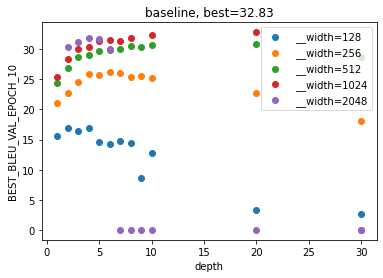

In [43]:
field = 'BEST_BLEU_VAL_EPOCH_10'
ax2, _ = make_curves(baseline_results, plt, title='baseline', field=field, experiment_name=' ', function=np.max)
ax2.legend(loc='best')

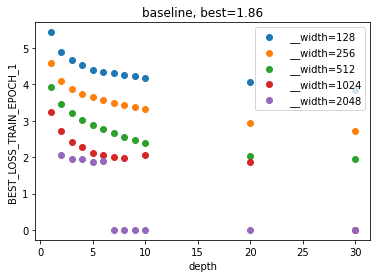

In [44]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'  # epoch -1
ax2, _ = make_curves(baseline_results, plt, title='baseline', field=field, experiment_name=' ')
ax2.legend(loc='best')

In [45]:
print('done')

done


#### FLOPs ratio

In [46]:
flops_data = np.genfromtxt('./FLOPs_counts.csv', delimiter=',', dtype=None, names=True)
print(len(flops_data), flops_data.dtype)

432 [('n_layers', '<i8'), ('d_model_width', '<i8'), ('direction', 'S2'), ('type', 'S15'), ('FLOPS', '<i8')]


<ipython-input-46-e6a0e2f352f7>:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  flops_data = np.genfromtxt('./FLOPs_counts.csv', delimiter=',', dtype=None, names=True)


In [47]:
print(np.unique(flops_data['type']))
# flops_data['type'] == b'Full'
flops_baseline_results = flops_data[flops_data['type'] == b'Full']
len(flops_baseline_results)
flops_baseline_results_fw = flops_baseline_results[flops_baseline_results['direction'] == b'FW']
print(len(flops_baseline_results_fw))
flops_baseline_results_bw = flops_baseline_results[flops_baseline_results['direction'] == b'BW']
print(len(flops_baseline_results_bw))

[b'Full' b'det_top_k k=256' b'det_top_k k=64']
72
72


In [48]:
flops_k_256_results = flops_data[flops_data['type'] == b'det_top_k k=256']
flops_k_256_results_fw = flops_k_256_results[flops_k_256_results['direction'] == b'FW']
flops_k_256_results_bw = flops_k_256_results[flops_k_256_results['direction'] == b'BW']

flops_k_64_results = flops_data[flops_data['type'] == b'det_top_k k=64']
flops_k_64_results_fw = flops_k_64_results[flops_k_64_results['direction'] == b'FW']
flops_k_64_results_bw = flops_k_64_results[flops_k_64_results['direction'] == b'BW']

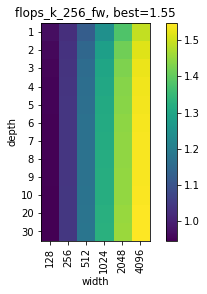

In [49]:
def make_FLOPs_change_heatmap(baseline_results, experiment_results, ax, title='', vmin=None, vmax=None, filter_outlying_baselines=False, function=np.max):
    all_layers = np.unique(experiment_results['n_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers'])
    all_widths_experiment = np.unique(experiment_results['d_model_width'])

    all_train_losses = np.zeros((len(all_layers), len(all_widths_experiment)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers'] == layer]
        layers_slice = experiment_results[experiment_results['n_layers'] == layer]

        all_widths_baseline = np.unique(layers_slice_baseline['d_model_width'])
        all_widths_experiment_ = np.unique(layers_slice['d_model_width'])
        for width_idx, width in enumerate(all_widths_experiment_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_width'] == width]
            width_slice_experiment = layers_slice[layers_slice['d_model_width'] == width]
            
#             train_wall_times = np.array([
#                 width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
#                 width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
#                 width_slice_baseline['epoch_30'],
#             ])
#             # compute median across 2 trials, 5 measurements/trial
#             flat_train_wall_times_ = train_wall_times.flatten()  # filter out nan valeus.
#             flat_train_wall_times = flat_train_wall_times_[~np.isnan(flat_train_wall_times_)]
#             median_train_wall_time_baseline = np.median(flat_train_wall_times)
#             if filter_outlying_baselines and np.any(median_train_wall_time_baseline * 2. > np.min(width_slice_baseline['Median'])):
#                 # if the computed baseline is 2x greater than the min-median of the runs
#                 # then just reassign the baseline value.
#                 median_train_wall_time_baseline = np.min(width_slice_baseline['Median'])
#             # This is the 1x multiplier.
            
            baseline_flops = width_slice_baseline['FLOPS']
            
            # grab the experiment median runtime
#             width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
#             width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]
            experiment_flops = width_slice_experiment['FLOPS']
            
            ratio_vs_baseline = baseline_flops / experiment_flops  # compute ratio vs baseline.

            all_train_losses[layer_idx, width_idx] = ratio_vs_baseline # np.max(ratio_vs_baseline) if len(ratio_vs_baseline) > 0 else 0

    np.nan_to_num(all_train_losses, copy=False)

    imgresult = ax.imshow(all_train_losses, vmin=vmin, vmax=vmax)
    title += ', best={:0.2f}'.format(function(all_train_losses[all_train_losses != 0]))
    try:
        ax.set_title(title)
        ax.set_xticks(ticks=range(len(all_widths_experiment)))
        ax.set_xticklabels(labels=all_widths_experiment, rotation=90)
        ax.set_yticks(ticks=range(len(all_layers)))
        ax.set_yticklabels(labels=all_layers, rotation=90)
    except:
        ax.title(title)
        ax.xticks(ticks=range(len(all_widths_experiment)), labels=all_widths_experiment, rotation=90)
        ax.yticks(ticks=range(len(all_layers)), labels=all_layers)
        ax.xlabel('width')
        ax.ylabel('depth')
    return imgresult, all_train_losses

make_FLOPs_change_heatmap(flops_baseline_results_fw, flops_k_256_results_fw, plt, title='flops_k_256_fw', filter_outlying_baselines=True)
plt.colorbar()

[1. 1. 1.]
[1.5420729  1.54521694 1.54627308]
[1.57357407 1.57696918 1.57810983]
[1.53894657 1.54413953 1.54589283]
[1.57016006 1.5757663  1.57765962]
1.5776596215421415
ratio is baseline_flops/experiment_flops,
>1 improvement, <1 worse


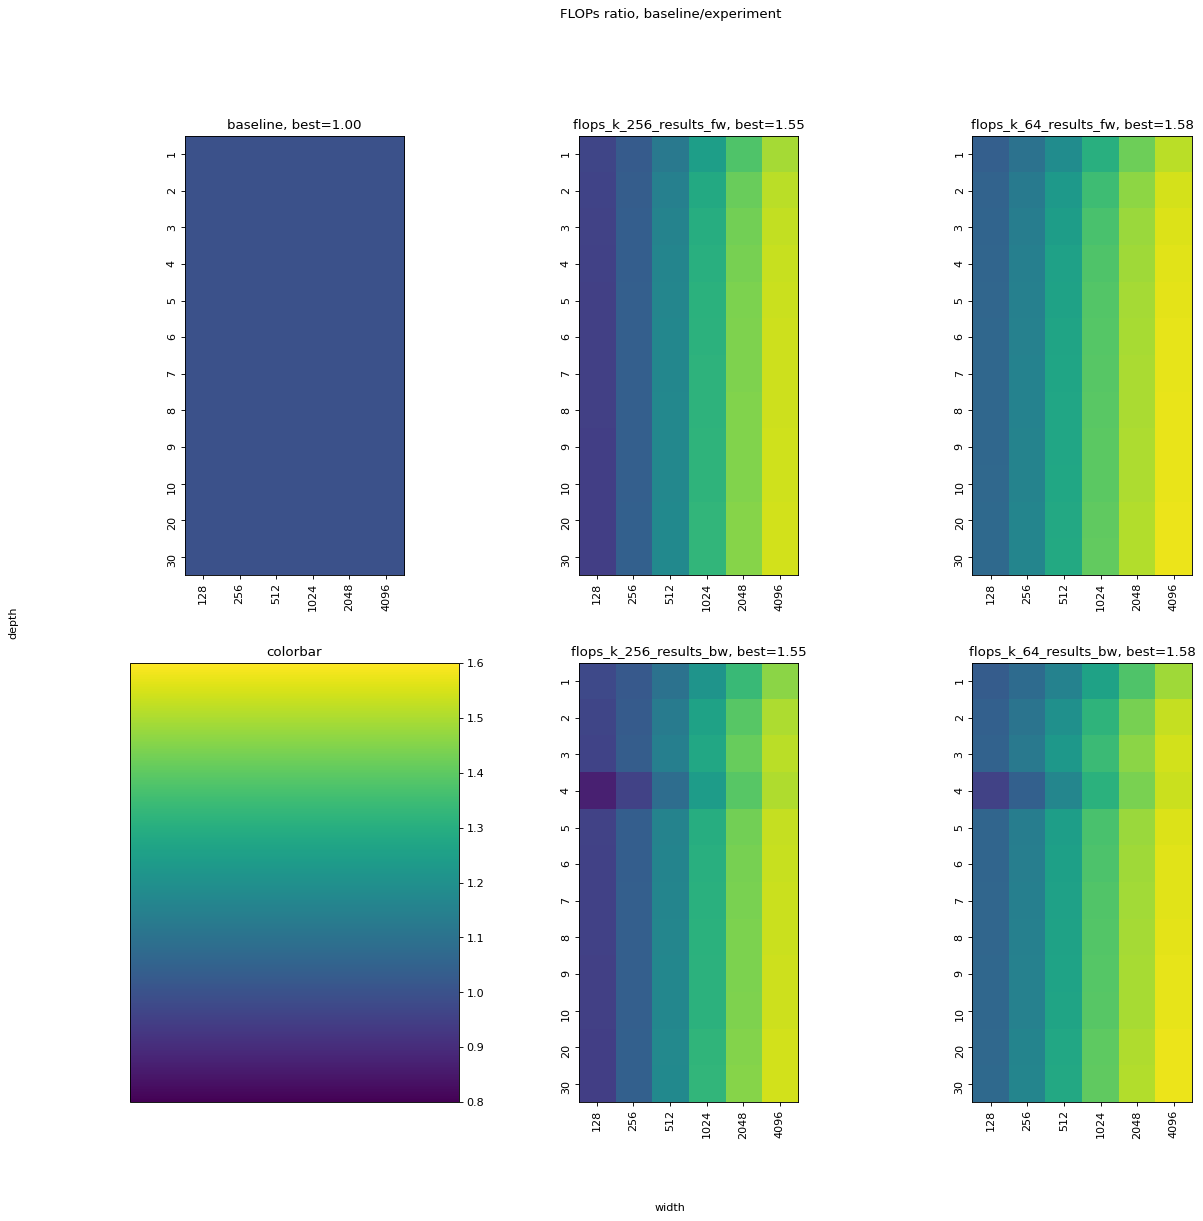

In [50]:
# vmin, vmax = get_normalizing_values(field)
# Measuring min and max of derived quantity speedup, not of an existing field.
# set vmax to 3.5 (max current speedup)
vmin, vmax = 0.8, 1.6
# vmin, vmax = None, None
# print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_FLOPs_change_heatmap(flops_baseline_results_fw, flops_baseline_results_fw, all_ax[0,0], title='baseline', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_FLOPs_change_heatmap(flops_baseline_results_fw, flops_k_256_results_fw, all_ax[0,1], title='flops_k_256_results_fw', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_FLOPs_change_heatmap(flops_baseline_results_fw, flops_k_64_results_fw, all_ax[0,2], title='flops_k_64_results_fw', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_FLOPs_change_heatmap(flops_baseline_results_bw, flops_k_256_results_bw, all_ax[1,1], title='flops_k_256_results_bw', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
result = make_FLOPs_change_heatmap(flops_baseline_results_bw, flops_k_64_results_bw, all_ax[1,2], title='flops_k_64_results_bw', vmin=vmin, vmax=vmax)
indexes = np.argsort(result[1], axis=None); print(result[1].flatten()[indexes[-3:]])
print(np.max(result[1]))

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('FLOPs ratio, baseline/experiment')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')
print('ratio is baseline_flops/experiment_flops,\n>1 improvement, <1 worse')
plt.savefig('FLOPs ratio, baseline_experiment.png')

#### FLOPS vs depth

In [51]:
# def make_flops_curves(flops_results, ax, title='', direction=b'FW', function=np.min):
#     flops_results_fw = flops_results[flops_results['direction'] == direction]
    
#     # extract different series
#     for series in np.unique(flops_results_fw['type']):
#         series_data = flops_results_fw[flops_results_fw['type'] == series]
#         x_data = series_data['FLOPS']
#         y_data = series_data['Best_BLEU']
        
#         ax.scatter(
#             all_layers_baseline,  # i.e. depth
#             all_train_losses[:, width_idx],
#             label='{}__width={}'.format('', width),
# #             marker='s',
# #             edgecolors=color,
# #             facecolors='none' if 'single' in experiment_name else color,
#         )

#     np.nan_to_num(all_train_losses, copy=False)

#     title += ', best={:0.2f}'.format(function(all_train_losses[all_train_losses != 0]))
#     try:
#         ax.set_title(title)
#         ax.set_xticks(ticks=range(len(all_widths_baseline)))
#         ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
#         ax.set_yticks(ticks=range(len(all_layers_baseline)))
#         ax.set_yticklabels(labels=all_layers_baseline, rotation=90)
#     except:
#         ax.title(title)
#         ax.xlabel('depth')
#         ax.ylabel(field)
#     return ax, all_train_losses
    
# field = 'FLOPS'
# ax2, _ = make_flops_curves(flops_data, plt, title='BLEU vs FLOPs FW', direction=b'FW', function=np.max)
# ax2.legend(loc='best')

#### Best BLEU vs FLOPs

First, need to join the results from `flops_data` to that of results.

In [52]:
new_dt = np.dtype(results.dtype.descr + [('FLOPS_FW', '<i8'), ('FLOPS_BW', '<i8')])
results_w_flops = np.zeros(results.shape, dtype=new_dt)

# copy over data
for field in results.dtype.fields.keys():
    results_w_flops[field] = results[field]

# copy in FLOPs for each experiment from flops_data into results_w_flops
for result in results_w_flops:
    # match n_layers, width, type (experiment type)
    n_layers = result['n_layers_encoder_layers']
    d_model = result['d_model_encoder_embed_dim']
    layer_type = result['layer_type']
    layer_type_mapping = {
        b'baseline' : b'Full',
        b'crs_--strategy_det_top_k__k_256' : b'det_top_k k=256',
        b'crs_--strategy_det_top_k__k_64' : b'det_top_k k=64',
        b'crs_--strategy_single_norm__k_256' : b'det_top_k k=256',
        b'crs_--strategy_single_norm__k_64' : b'det_top_k k=64',
    }
    
    matches = np.logical_and(np.logical_and(
        flops_data['n_layers'] == n_layers, flops_data['d_model_width'] == d_model), flops_data['type'] == layer_type_mapping[layer_type])
    
    flops_data_matches = flops_data[matches]

    result['FLOPS_FW'] = flops_data_matches[flops_data_matches['direction'] == b'FW']['FLOPS']
    result['FLOPS_BW'] = flops_data_matches[flops_data_matches['direction'] == b'BW']['FLOPS']
    
results_w_flops['FLOPS_FW']

array([112763265024, 112763265024, 211597844480, 211597844480,
       310432423936, 310432423936, 409267003392, 409267003392,
       508101582848, 508101582848, 606936162304, 606936162304,
        12137717760,  12137717760,  20777984000,  20777984000,
        29418250240,  29418250240,  38058516480,  38058516480,
        46698782720,  46698782720,  55339048960,  55339048960,
        63979315200,  63979315200,  72619581440,  72619581440,
        81259847680,  81259847680,  89900113920,  89900113920,
       176302776320, 176302776320, 262705438720, 262705438720,
        34942148608,  34942148608,  62909767680,  62909767680,
        90877386752,  90877386752, 118845005824, 118845005824,
       146812624896, 146812624896, 174780243968, 174780243968,
       202747863040, 202747863040, 230715482112, 230715482112,
       258683101184, 258683101184, 286650720256, 286650720256,
       566326910976, 566326910976,   4762034176,   4762034176,
         7765155840,   7765155840,  10768277504,  10768

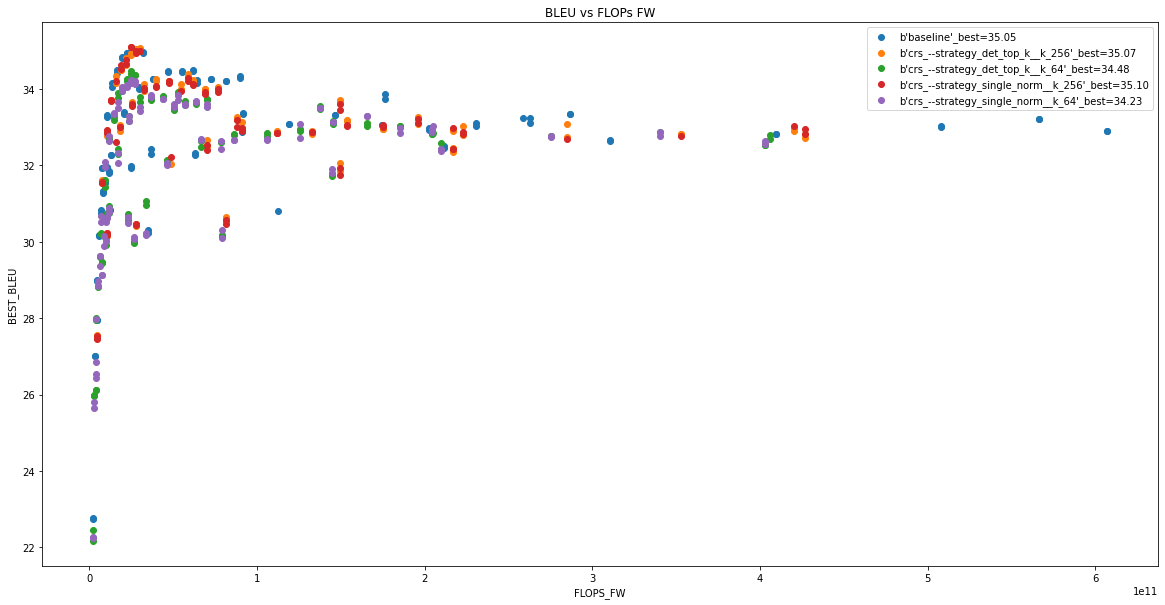

In [53]:
def make_flops_curves(results_w_flops, ax, title='', direction=b'FW', function=np.min):
    # flops_results_fw = flops_results[flops_results['direction'] == direction]
    
    # extract different series
    for series in np.unique(results_w_flops['layer_type']):
        series_data = results_w_flops[results_w_flops['layer_type'] == series]
        if direction == b'FW':
            field = 'FLOPS_FW'
        else:
            field = 'FLOPS_BW'
        x_data = series_data[field]
        y_data = series_data['BEST_BLEU_VAL_EPOCH_120']
        np.nan_to_num(y_data, copy=False)
        no_bleu_score_matches = y_data == 0
        y_data = y_data[~no_bleu_score_matches]
        x_data = x_data[~no_bleu_score_matches]
        
        ax.scatter(
            x_data,
            y_data,
            label='{}_best={:.2f}'.format(series, function(y_data))
        )

    try:
        ax.set_title(title)
#         ax.set_xticks(ticks=range(len(all_widths_baseline)))
#         ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
#         ax.set_yticks(ticks=range(len(all_layers_baseline)))
#         ax.set_yticklabels(labels=all_layers_baseline, rotation=90)
    except:
        ax.title(title)
        ax.xlabel(field)
        ax.ylabel('BEST_BLEU')
    return ax
    
plt.rcParams['figure.figsize'] = [20, 10]
field = 'FLOPS'
ax2 = make_flops_curves(results_w_flops, plt, title='BLEU vs FLOPs FW', direction=b'FW', function=np.max)
ax2.legend(loc='best')
plt.savefig('BLEU_vs_FLOPS_FW.png')

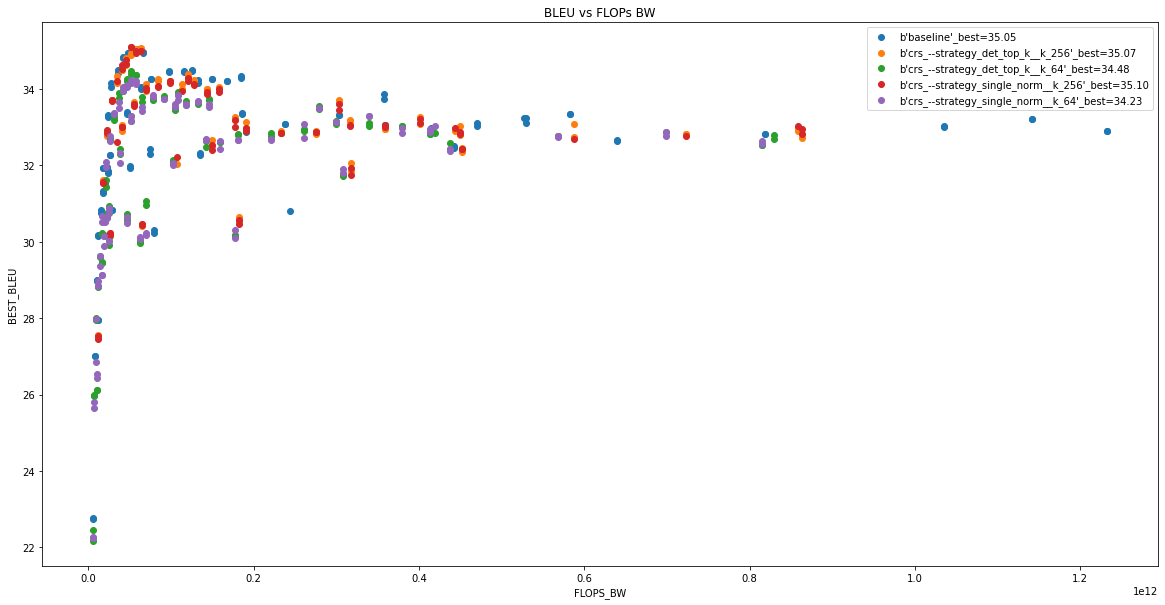

In [54]:
ax2 = make_flops_curves(results_w_flops, plt, title='BLEU vs FLOPs BW', direction=b'BW', function=np.max)
ax2.legend(loc='best')
plt.savefig('BLEU_vs_FLOPS_BW.png')

Presentation Plot

BLEU vs width

(fixed depth=6)

Series = [baseline, det_top_k_k_64, det_top_k_k_256, single_norm_k_64, single_norm_k_256]

/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.04, 0.5, 'Val BLEU')

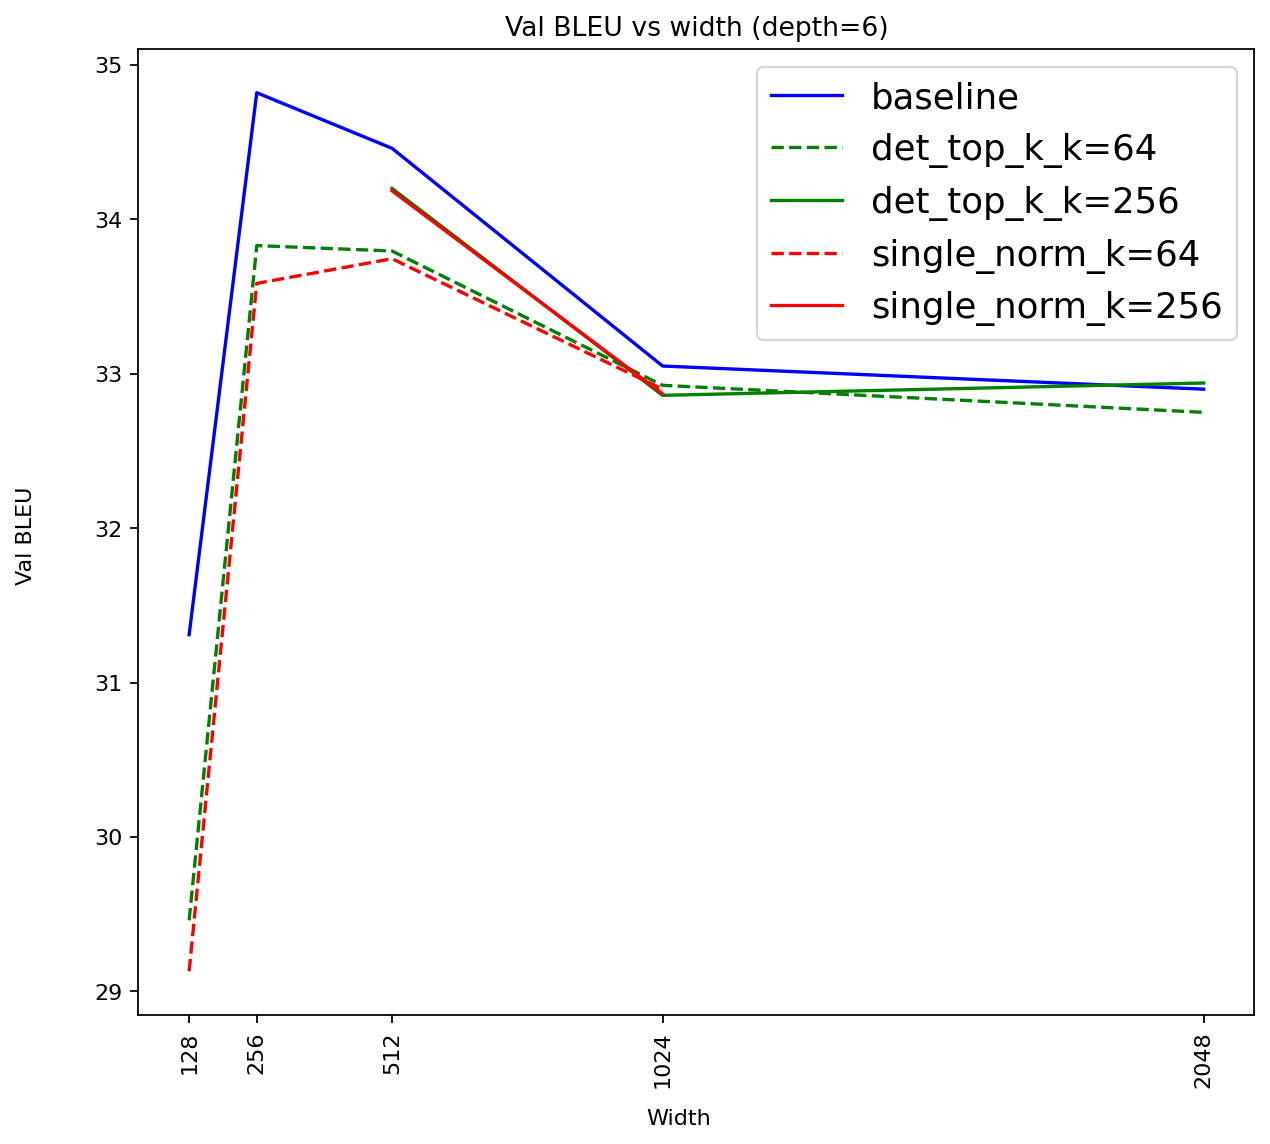

In [293]:
def make_lineplot(results_and_titles, ax, title='', field='BEST_LOSS_TRAIN_EPOCH_1', vmin=None, vmax=None, function=np.min, LAYER=6):
    results_baseline = results_and_titles['baseline']
    all_layers_baseline = np.unique(results_baseline['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(results_baseline['d_model_encoder_embed_dim'])

    # all_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))
    for series_name, results in results_and_titles.items():
        fixed_depth_losses = np.zeros((len(all_widths_baseline)))
        for layer in [LAYER,]:  # depth
            layers_slice_baseline = results[results['n_layers_encoder_layers'] == layer]

            all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
            # max_width_baseline = max(all_widths_baseline_)
            for width_idx, width in enumerate(all_widths_baseline):  # width
                width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

                fixed_depth_losses[width_idx] = np.mean(width_slice_baseline[field])

            np.nan_to_num(fixed_depth_losses, copy=False)

            # make lineplot
            extra_args = {}
            if series_name == 'baseline':
                #extra_args['linewidth'] = 3.0
                extra_args['color'] = 'b'
            if 'k=64' in series_name:
                # extra_args['marker'] = '*'
                extra_args['linestyle'] = 'dashed'
            if 'single_norm' in series_name:
                extra_args['color'] = 'r'
            if 'det_top_k' in series_name:
                extra_args['color'] = 'g'
            if 'k=256' in series_name:
                fixed_depth_losses[1] = 0
            ax.plot(
                all_widths_baseline[fixed_depth_losses > 0],
                
                fixed_depth_losses[fixed_depth_losses > 0],
                label=series_name, **extra_args
            )
            # ax.plot(all_widths_baseline_, fixed_depth_losses, )
    # title += '(depth={}), best={:0.2f}'.format(LAYER, globalbest)
    title += '(depth={})'.format(LAYER)
    
    
    ax.set_title(title)
    ax.set_xticks(ticks=all_widths_baseline)
    ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
    ax.legend(prop={'size': 16})
    return ax, fixed_depth_losses


field = 'BEST_BLEU_VAL_EPOCH_120'
# make_lineplot(baseline_results, all_ax[0,0], title='baseline', field='BEST_BLEU_VAL_EPOCH_120', vmin=vmin, vmax=vmax, function=np.max)
data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
}
fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)

result = make_lineplot(data, all_ax, title='Val BLEU vs width ', field=field, vmin=vmin, vmax=vmax, function=np.max)


fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'Val BLEU', va='center', rotation='vertical')



/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/from

Text(0.04, 0.5, 'BLEU')

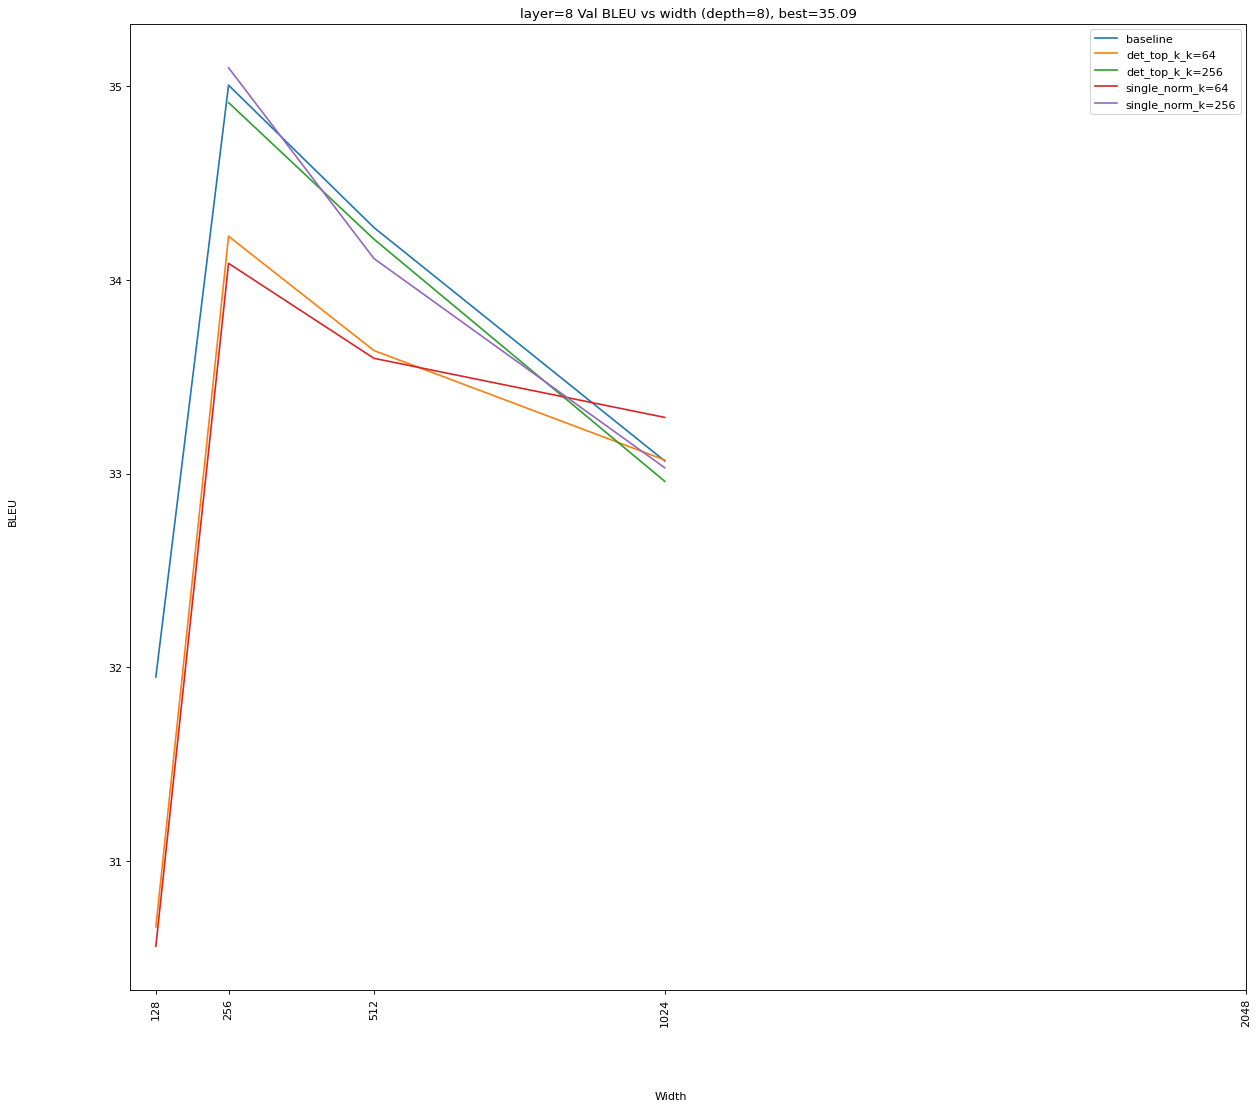

In [119]:
fig, all_ax = plt.subplots(1, 1, figsize=(18, 16), dpi= 80)
layer=8
field = 'BEST_BLEU_VAL_EPOCH_120'
result = make_lineplot(data, all_ax, title='layer={} Val BLEU vs width '.format(layer), field=field, vmin=vmin, vmax=vmax, function=np.max, LAYER=layer)
fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'BLEU', va='center', rotation='vertical')

Evening out the performance as width increases

/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/from

Text(0.04, 0.5, 'BLEU')

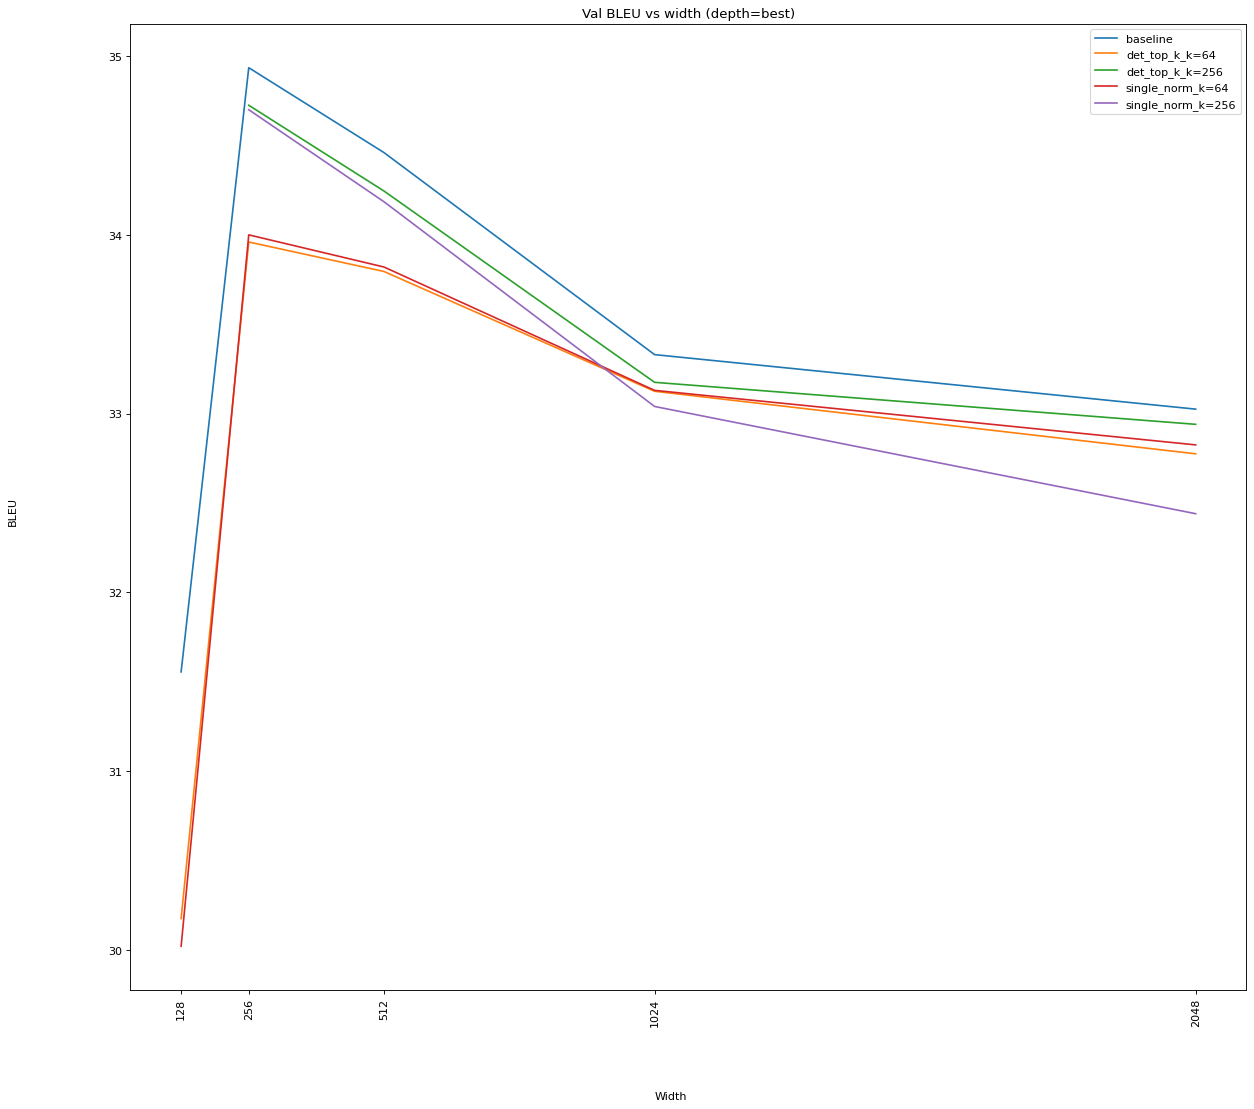

In [149]:
def make_lineplot_layer_range(results_and_titles, ax, title='', field='BEST_LOSS_TRAIN_EPOCH_1', vmin=None, vmax=None, function=np.min, LAYER=6):
    results_baseline = results_and_titles['baseline']
    all_layers_baseline = np.unique(results_baseline['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(results_baseline['d_model_encoder_embed_dim'])

    layer_range = range(3, 8)

    for series_name, results in results_and_titles.items():
        all_losses = np.zeros((len(layer_range), len(all_widths_baseline)))
        fixed_depth_losses = np.zeros((len(all_widths_baseline)))
        for idx, layer in enumerate(layer_range):  # depth
            layers_slice_baseline = results[results['n_layers_encoder_layers'] == layer]

            # all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
            # max_width_baseline = max(all_widths_baseline_)
            for width_idx, width in enumerate(all_widths_baseline):  # width
                width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

                fixed_depth_losses[width_idx] = np.mean(width_slice_baseline[field])

            all_losses[idx, :] = fixed_depth_losses
            np.nan_to_num(fixed_depth_losses, copy=False)
            np.nan_to_num(all_losses, copy=False)

            if 0 and series_name == 'baseline' and layer == LAYER:
                ax.plot(all_widths_baseline[fixed_depth_losses > 0], fixed_depth_losses[fixed_depth_losses > 0], label=series_name)
            if 0:
                # make lineplot
                ax.plot(all_widths_baseline[fixed_depth_losses > 0], fixed_depth_losses[fixed_depth_losses > 0], label=series_name)
        if 1 or series_name != 'baseline':
            # assert 0
            series_to_plot = np.zeros((len(all_widths_baseline)))
            series_to_plot[0] = np.max(all_losses[:, 0]) # 128
            series_to_plot[1] = np.max(all_losses[:, 1]) # 256
            series_to_plot[2] = np.max(all_losses[:, 2][all_losses[:, 2] > 0]) # 512
            series_to_plot[3] = np.max(all_losses[:, 3]) # 1024
            series_to_plot[4] = np.max(all_losses[:, 4]) # 2048
            ax.plot(all_widths_baseline[series_to_plot > 0], series_to_plot[series_to_plot > 0], label=series_name)
#             ax.plot(all_widths_baseline[fixed_depth_losses > 0], fixed_depth_losses[fixed_depth_losses > 0], label=series_name)
    # title += '(depth={}), best={:0.2f}'.format(LAYER, function(fixed_depth_losses[fixed_depth_losses != 0]))
    # title += '(depth=best), best={:0.2f}'.format(function(fixed_depth_losses[fixed_depth_losses != 0]))
    title += '(depth=best)'
    ax.set_title(title)
    ax.set_xticks(ticks=all_widths_baseline)
    ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
    ax.legend()
    return ax, fixed_depth_losses


field = 'BEST_BLEU_VAL_EPOCH_120'
# make_lineplot(baseline_results, all_ax[0,0], title='baseline', field='BEST_BLEU_VAL_EPOCH_120', vmin=vmin, vmax=vmax, function=np.max)
data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
}
fig, all_ax = plt.subplots(1, 1, figsize=(18, 16), dpi= 80)
result = make_lineplot_layer_range(data, all_ax, title='Val BLEU vs width ', field=field, vmin=vmin, vmax=vmax, function=np.max)
fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'BLEU', va='center', rotation='vertical')


In [146]:
baseline_results.dtype

dtype([('layer_type', 'S33'), ('fp16', 'S4'), ('LR', '<f8'), ('d_model_encoder_embed_dim', '<i8'), ('d_ffn_encoder_ffn_embed_dim', '<i8'), ('n_heads_encoder_attention_heads', '<i8'), ('d_head_encoder_head_dim', '<i8'), ('n_layers_encoder_layers', '<i8'), ('d_model_decoder_embed_dim', '<i8'), ('d_ffn_decoder_ffn_embed_dim', '<i8'), ('n_heads_decoder_attention_heads', '<i8'), ('d_head_decoder_head_dim', '<i8'), ('n_layers_decoder_layers', '<i8'), ('Total_Params_formula_no_bias_or_LayerNorm_params', '<i8'), ('dropout', '<f8'), ('batch_size_maxtokens', '<i8'), ('trainable_params_fairseq_log', 'S11'), ('application_id', '<i8'), ('experiment', 'S8'), ('BEST_BLEU_VAL_EPOCH_10', '<f8'), ('BEST_BLEU_VAL_EPOCH_20', '<f8'), ('BEST_BLEU_VAL_EPOCH_30', '<f8'), ('BEST_BLEU_VAL_EPOCH_120', '<f8'), ('BEST_LOSS_VAL_EPOCH_10', '<f8'), ('BEST_LOSS_VAL_EPOCH_20', '<f8'), ('BEST_LOSS_VAL_EPOCH_30', '<f8'), ('BEST_LOSS_VAL_EPOCH_120', '<f8'), ('BEST_LOSS_TRAIN_EPOCH_10', '<f8'), ('BEST_LOSS_TRAIN_EPOCH_20',

/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1.741649994125, 4.730350068375)

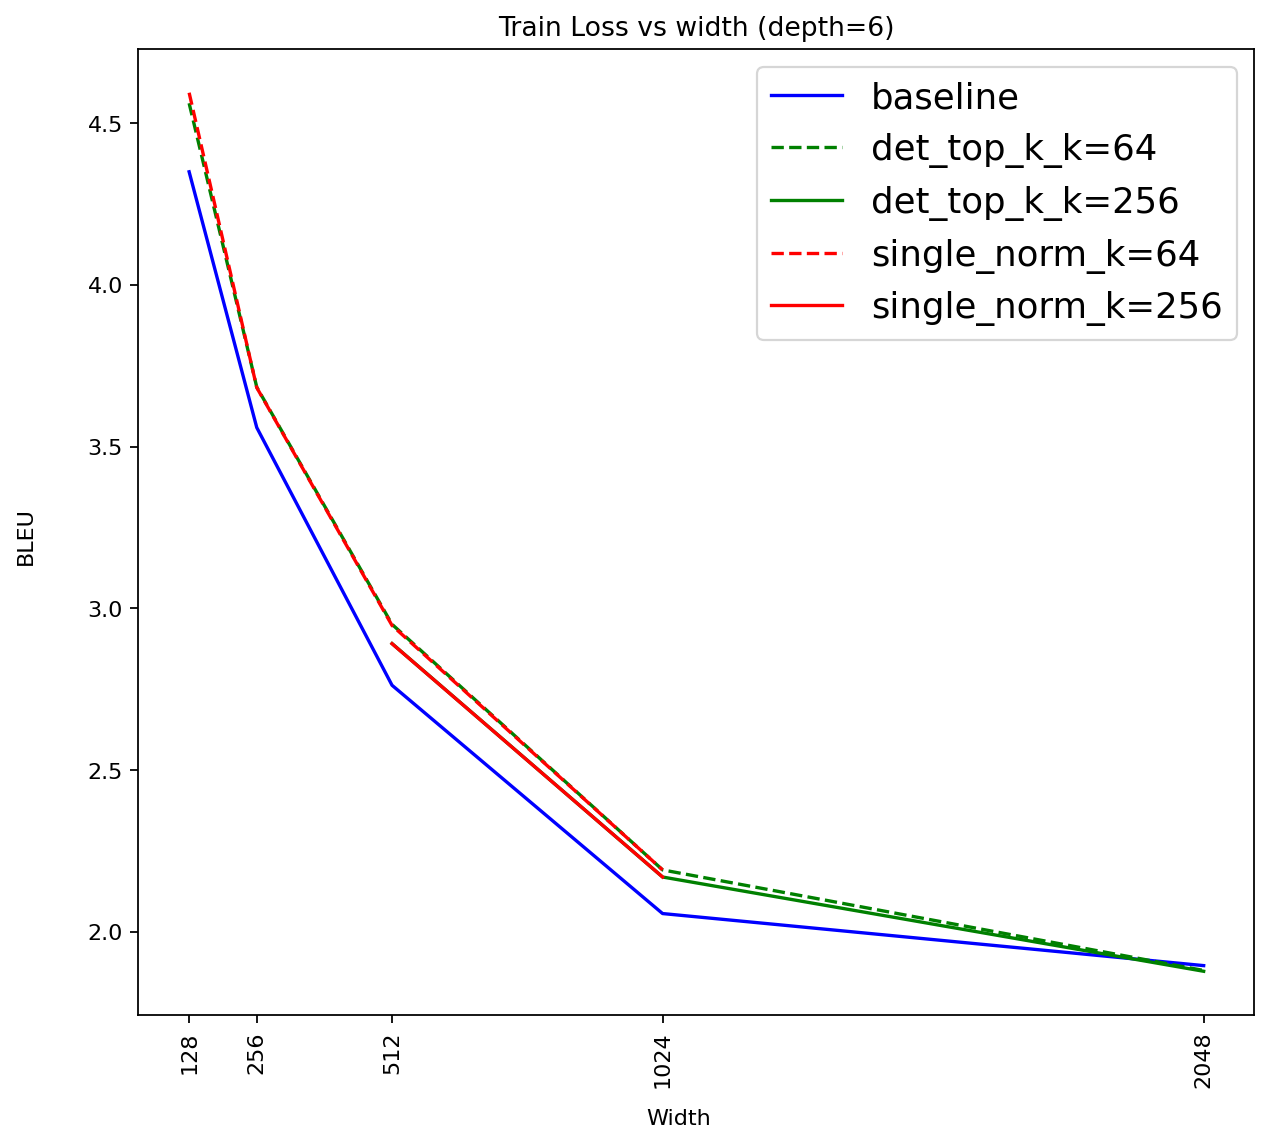

In [214]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'
fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)
data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
}

result = make_lineplot(data, all_ax, title='Train Loss vs width ', field=field, vmin=vmin, vmax=vmax, function=np.min)
fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'BLEU', va='center', rotation='vertical')
# all_ax.set_ylim(top=5, bottom=1)
all_ax.get_ylim()




/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.04, 0.5, 'Val Loss')

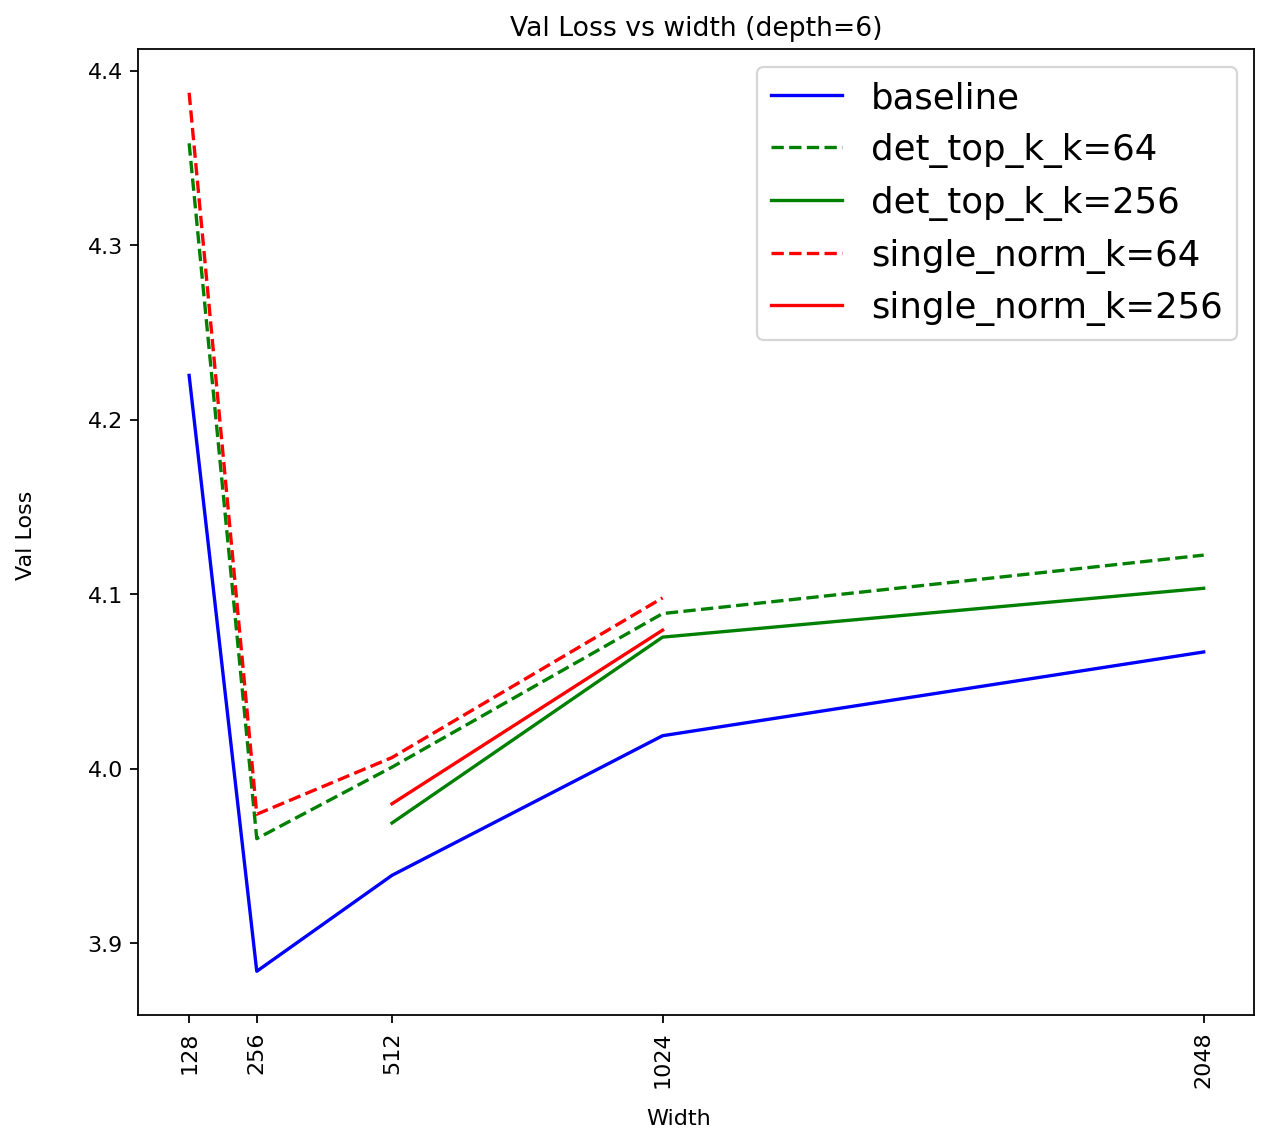

In [219]:
field = 'BEST_LOSS_VAL_EPOCH_120'
fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)

data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
}
result = make_lineplot(data, all_ax, title='Val Loss vs width ', field=field, vmin=vmin, vmax=vmax, function=np.min)

fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'Val Loss', va='center', rotation='vertical')
# all_ax.set_ylim(top=5, bottom=1)

Making the train loss plots "appear"/"staged"


(1.741649994125, 4.730350068375)

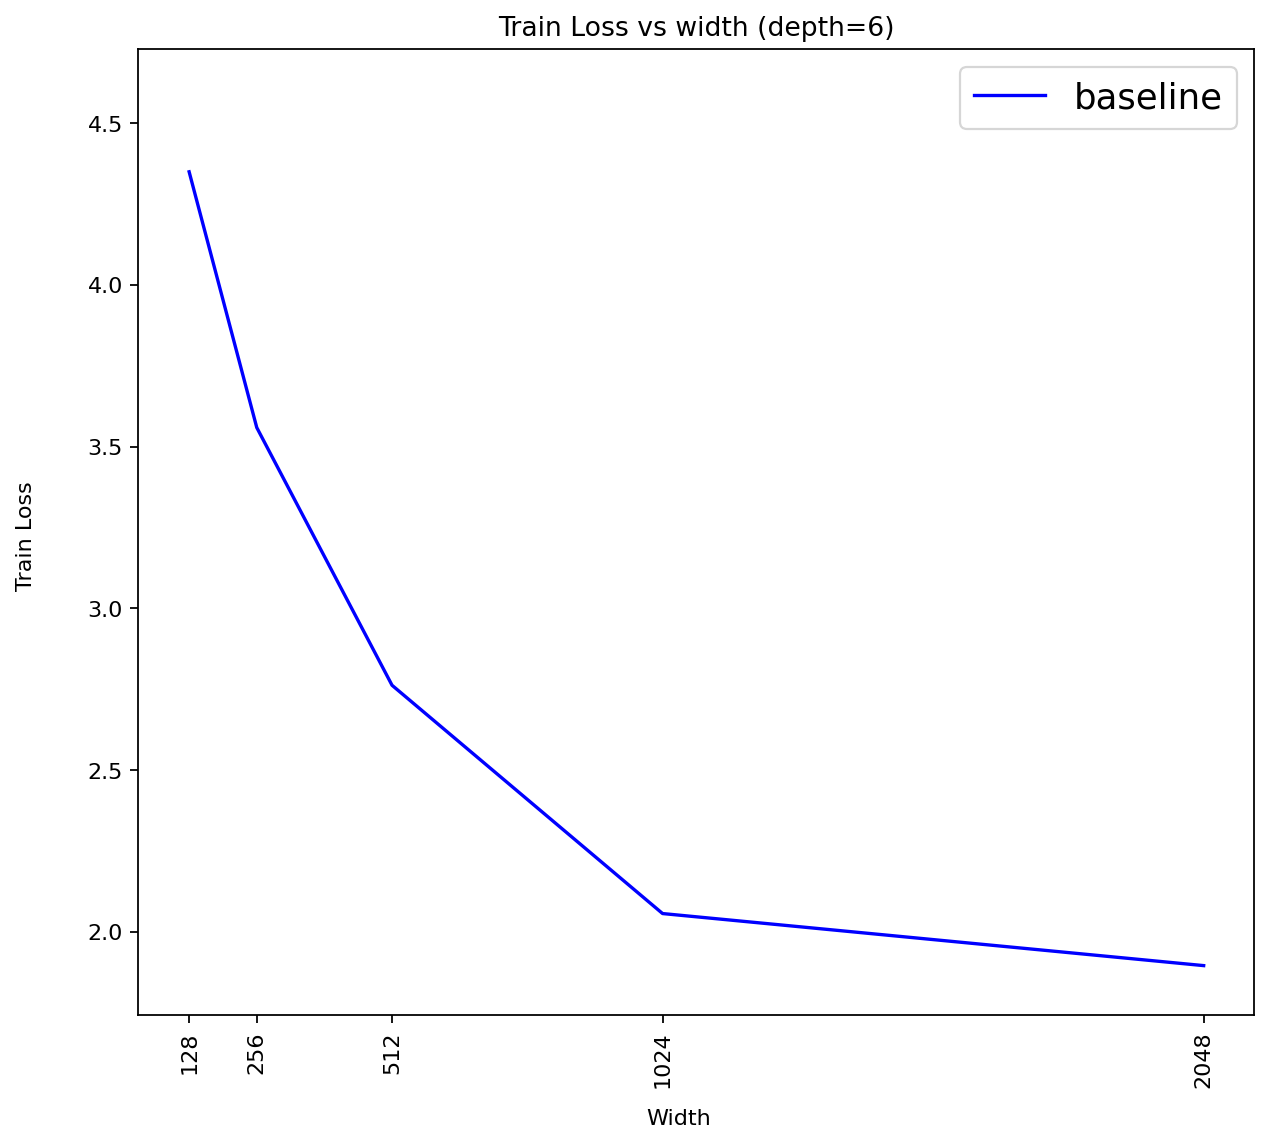

In [215]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'


fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)

data = {
    'baseline': baseline_results,
#     'det_top_k_k=64': det_top_k_k_64,
#     'det_top_k_k=256': det_top_k_k_256,
#     'single_norm_k=64': single_norm_k_64,
#     'single_norm_k=256': single_norm_k_256,
    
}
result = make_lineplot(data, all_ax, title='Train Loss vs width ', field=field, vmin=vmin, vmax=vmax, function=np.min)

fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'Train Loss', va='center', rotation='vertical')
all_ax.set_ylim(1.741649994125, 4.730350068375)



/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1.741649994125, 4.730350068375)

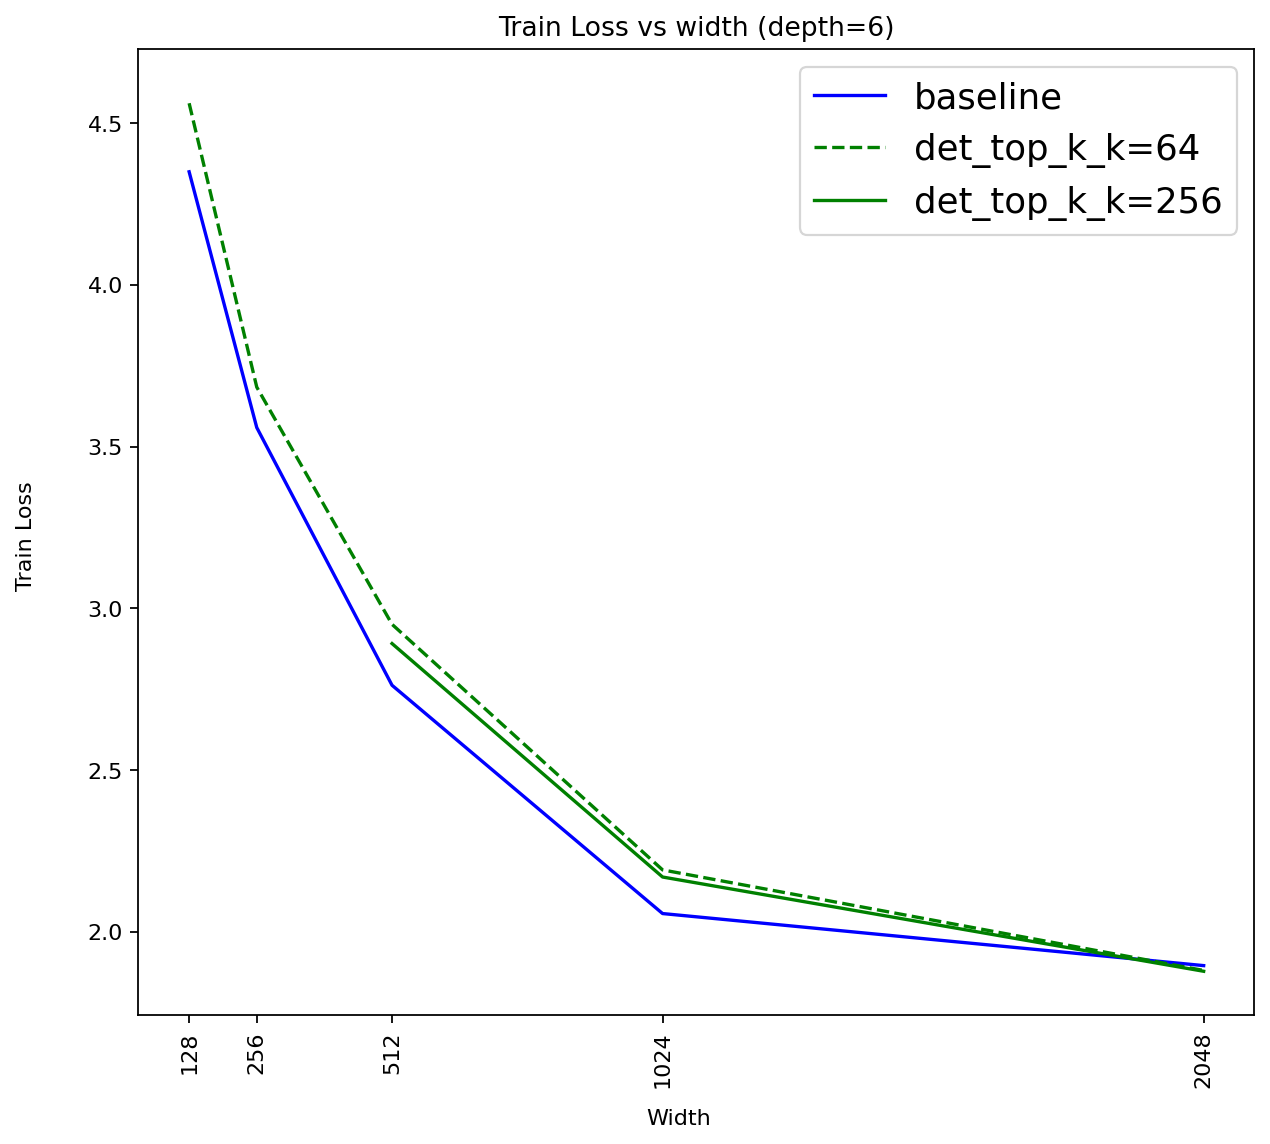

In [216]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'


fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)

data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    
#     'single_norm_k=64': single_norm_k_64,
#     'single_norm_k=256': single_norm_k_256,
    
}
result = make_lineplot(data, all_ax, title='Train Loss vs width ', field=field, vmin=vmin, vmax=vmax, function=np.min)

fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'Train Loss', va='center', rotation='vertical')
all_ax.set_ylim(1.741649994125, 4.730350068375)



/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jains/OneDrive/Documents/Professional/fall2020/openai_2020/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1.741649994125, 4.730350068375)

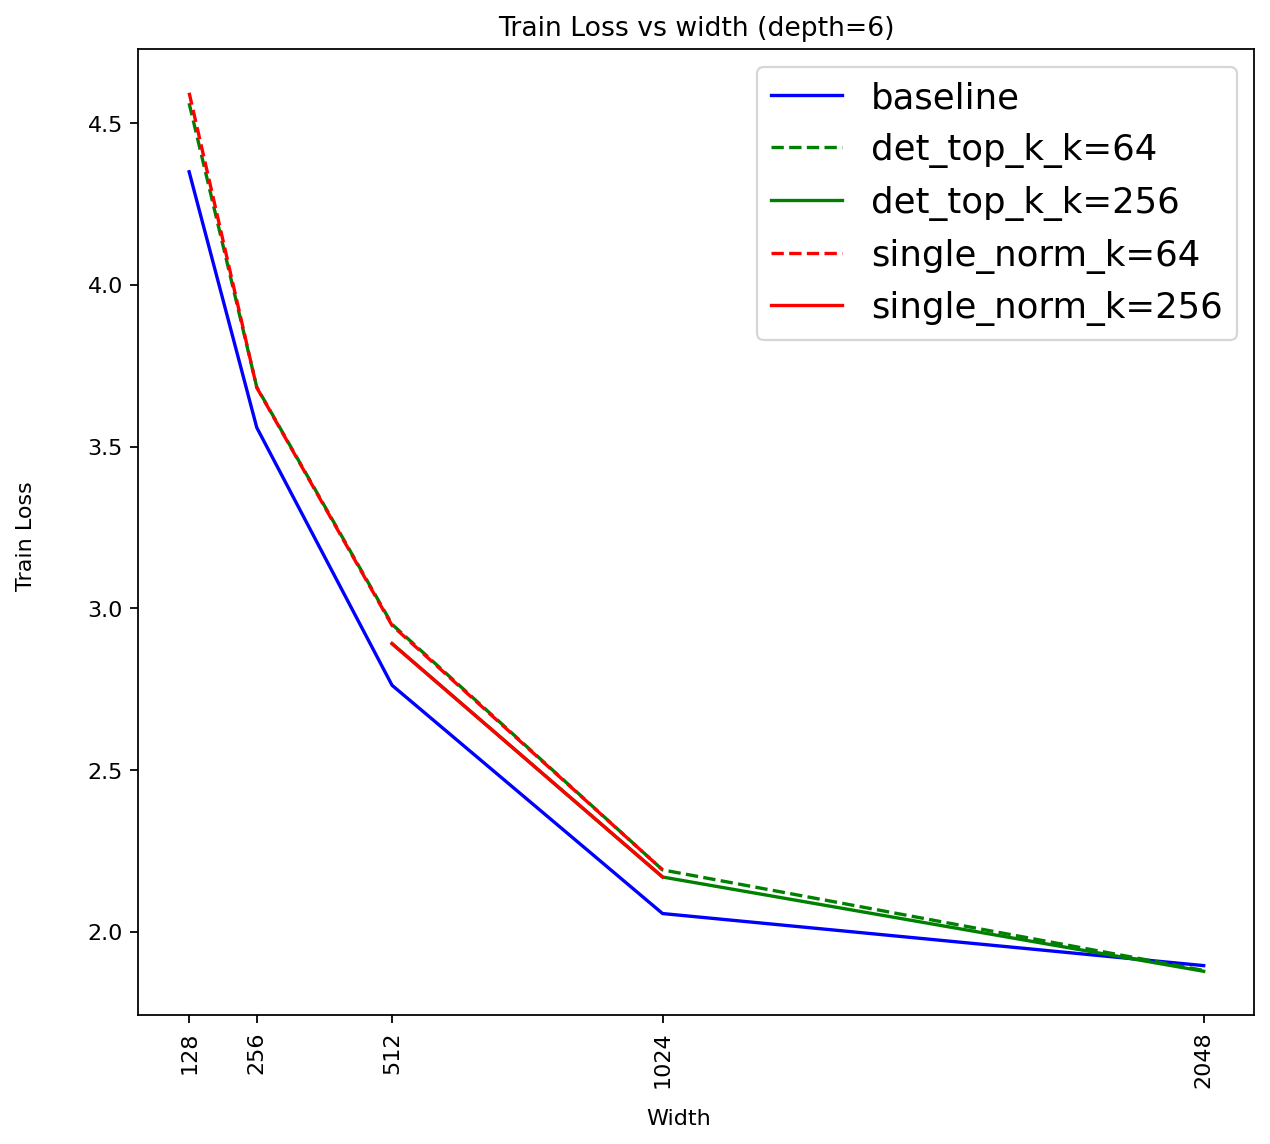

In [218]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'


fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)

data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
    
    
}
result = make_lineplot(data, all_ax, title='Train Loss vs width ', field=field, vmin=vmin, vmax=vmax, function=np.min)

fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'Train Loss', va='center', rotation='vertical')
all_ax.set_ylim(1.741649994125, 4.730350068375)




Theo. Speedup Line Plot (depth=6)

Text(0.04, 0.5, 'FLOPs Ratio')

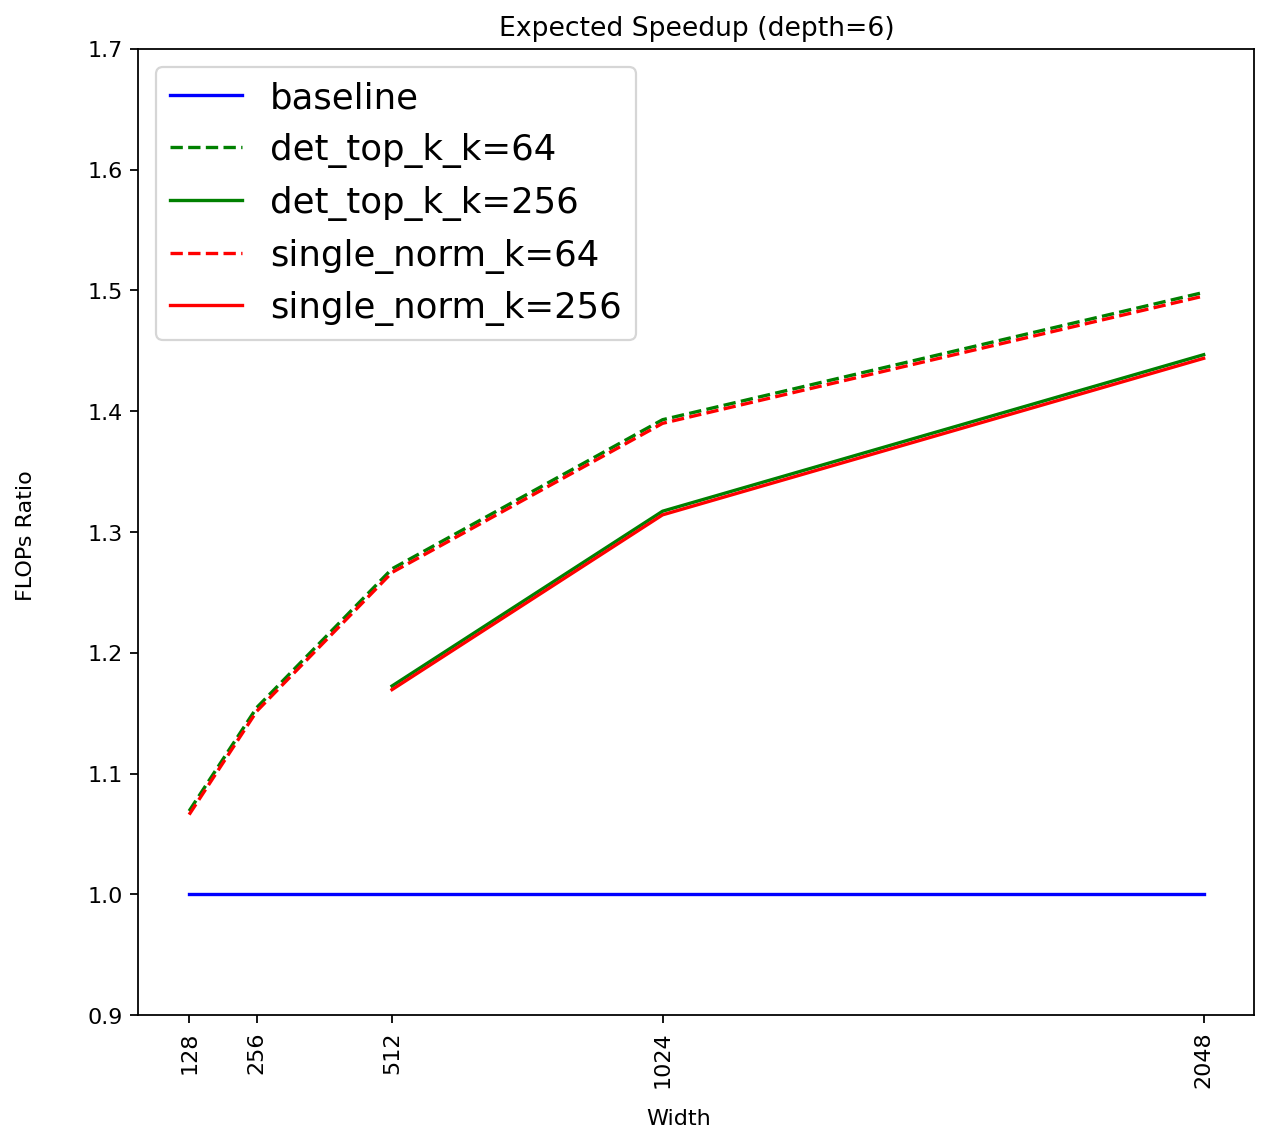

In [291]:
def plot_theo_speedup(results_and_titles, ax, title='', function=np.max, LAYER=6):
    baseline_results = results_baseline = results_and_titles['baseline']
    all_layers_baseline = np.unique(results_baseline['n_layers'])
    all_widths_baseline = np.unique(results_baseline['d_model_width'])

    
    # all_layers = np.unique(all_layers_baseline['n_layers'])
    
    # all_train_losses = np.zeros((len(all_layers), len(all_widths_experiment)))

    for series_name, experiment_results in results_and_titles.items():
        if 'bw' in series_name:
            continue
        fixed_depth_losses = np.zeros((len(all_widths_baseline)))
        for layer_idx, layer in enumerate([LAYER,]):  # depth   
            layers_slice_baseline = baseline_results[baseline_results['n_layers'] == layer]
            layers_slice = experiment_results[experiment_results['n_layers'] == layer]

            all_widths_baseline = np.unique(layers_slice_baseline['d_model_width'])
            all_widths_experiment_ = np.unique(layers_slice['d_model_width'])
            for width_idx, width in enumerate(all_widths_experiment_):  # width
                width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_width'] == width]
                width_slice_experiment = layers_slice[layers_slice['d_model_width'] == width]
                

                baseline_flops = width_slice_baseline['FLOPS']
                
                experiment_flops = width_slice_experiment['FLOPS']
                
                
                ratio_vs_baseline = baseline_flops / experiment_flops  # compute ratio vs baseline.

                fixed_depth_losses[width_idx] = ratio_vs_baseline # np.max(ratio_vs_baseline) if len(ratio_vs_baseline) > 0 else 0

            np.nan_to_num(fixed_depth_losses, copy=False)

            # make lineplot
            extra_args = {}
            if series_name == 'baseline':
                #extra_args['linewidth'] = 3.0
                extra_args['color'] = 'b'
            if 'k=64' in series_name:
                # extra_args['marker'] = '*'
                extra_args['linestyle'] = 'dashed'
            if 'single_norm' in series_name:
                extra_args['color'] = 'r'
            if 'det_top_k' in series_name:
                extra_args['color'] = 'g'
                fixed_depth_losses += 0.003
            if 'k=256' in series_name:
                fixed_depth_losses[0:2] = 0
                #extra_args['color'] = 'g'
            fixed_depth_losses[-1] = 0  # exclude 4096
            ax.plot(
                all_widths_baseline[fixed_depth_losses > 0],
                fixed_depth_losses[fixed_depth_losses > 0],
                label=series_name, **extra_args)

    # plot baseline only
    # all_widths_baseline[fixed_depth_losses > 0], fixed_depth_losses[fixed_depth_losses > 0], label=series_name, **extra_args)

    ax.set_title(title + f'(depth={LAYER})')
    ax.set_xticks(ticks=all_widths_baseline[:-1])
    ax.set_xticklabels(labels=all_widths_baseline[:-1], rotation=90)
    ax.legend(prop={'size': 16})
    
    

field = 'BEST_BLEU_VAL_EPOCH_120'
# make_lineplot(baseline_results, all_ax[0,0], title='baseline', field='BEST_BLEU_VAL_EPOCH_120', vmin=vmin, vmax=vmax, function=np.max)
data = {
    'baseline': flops_baseline_results_fw,
    'det_top_k_k=64': flops_k_64_results_fw,
    'det_top_k_k=256': flops_k_256_results_fw,
    'single_norm_k=64': flops_k_64_results_fw,
    'single_norm_k=256': flops_k_256_results_fw,
    'bw_k=64': flops_k_64_results_bw,
    'bw_k=256': flops_k_256_results_bw,
}
fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)
result = plot_theo_speedup(data, all_ax, title='Expected Speedup ', function=np.max)
all_ax.set_ylim(0.9, 1.7)




fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'FLOPs Ratio', va='center', rotation='vertical')







# make_FLOPs_change_heatmap(flops_baseline_results_fw, flops_k_256_results_fw, plt, title='flops_k_256_fw', filter_outlying_baselines=True)
# plt.colorbar()

In [228]:
%debug

> <ipython-input-227-4c1a49b36ccf>(14)plot_theo_speedup()
     12         fixed_depth_losses = np.zeros((len(all_widths_baseline)))
     13         for layer_idx, layer in enumerate([LAYER,]):  # depth
---> 14             layers_slice_baseline = baseline_results[baseline_results['n_layers'] == layer]
     15             layers_slice = experiment_results[experiment_results['n_layers'] == layer]
     16 

ipdb> baseline_results
array([(b'baseline', b'fp16', 0.00025   , 2048, 4096, 4, 512,  1, 2048, 4096, 4, 512,  1, 115589120, 0.3, 2048, b'run0', 1583898264103228687, b'50b4d944', 27.76000023, 30.09000015, 30.79999924, 30.79999924, 4.72800016, 4.62699986, 4.62699986, 4.62699986, 4.22700024, 3.53500009, 3.20600009, 2.41599989, b'?',  72.975,  72.083,  72.767, 149.667,  67.695,  72.77),
       (b'baseline', b'fp16', 0.00025   , 2048, 4096, 4, 512,  1, 2048, 4096, 4, 512,  1, 115589120, 0.3, 2048, b'run1', 1583898264103228682, b'50b4d944',         nan,         nan,         nan,         nan, 

ipdb> baseline_results['n_layers']
*** ValueError: no field of name n_layers
ipdb> quit


In [232]:
flops_baseline_results_fw.dtype

dtype([('n_layers', '<i8'), ('d_model_width', '<i8'), ('direction', 'S2'), ('type', 'S15'), ('FLOPS', '<i8')])

Observed Speedup Lineplot

Text(0.04, 0.5, 'FLOPs Ratio')

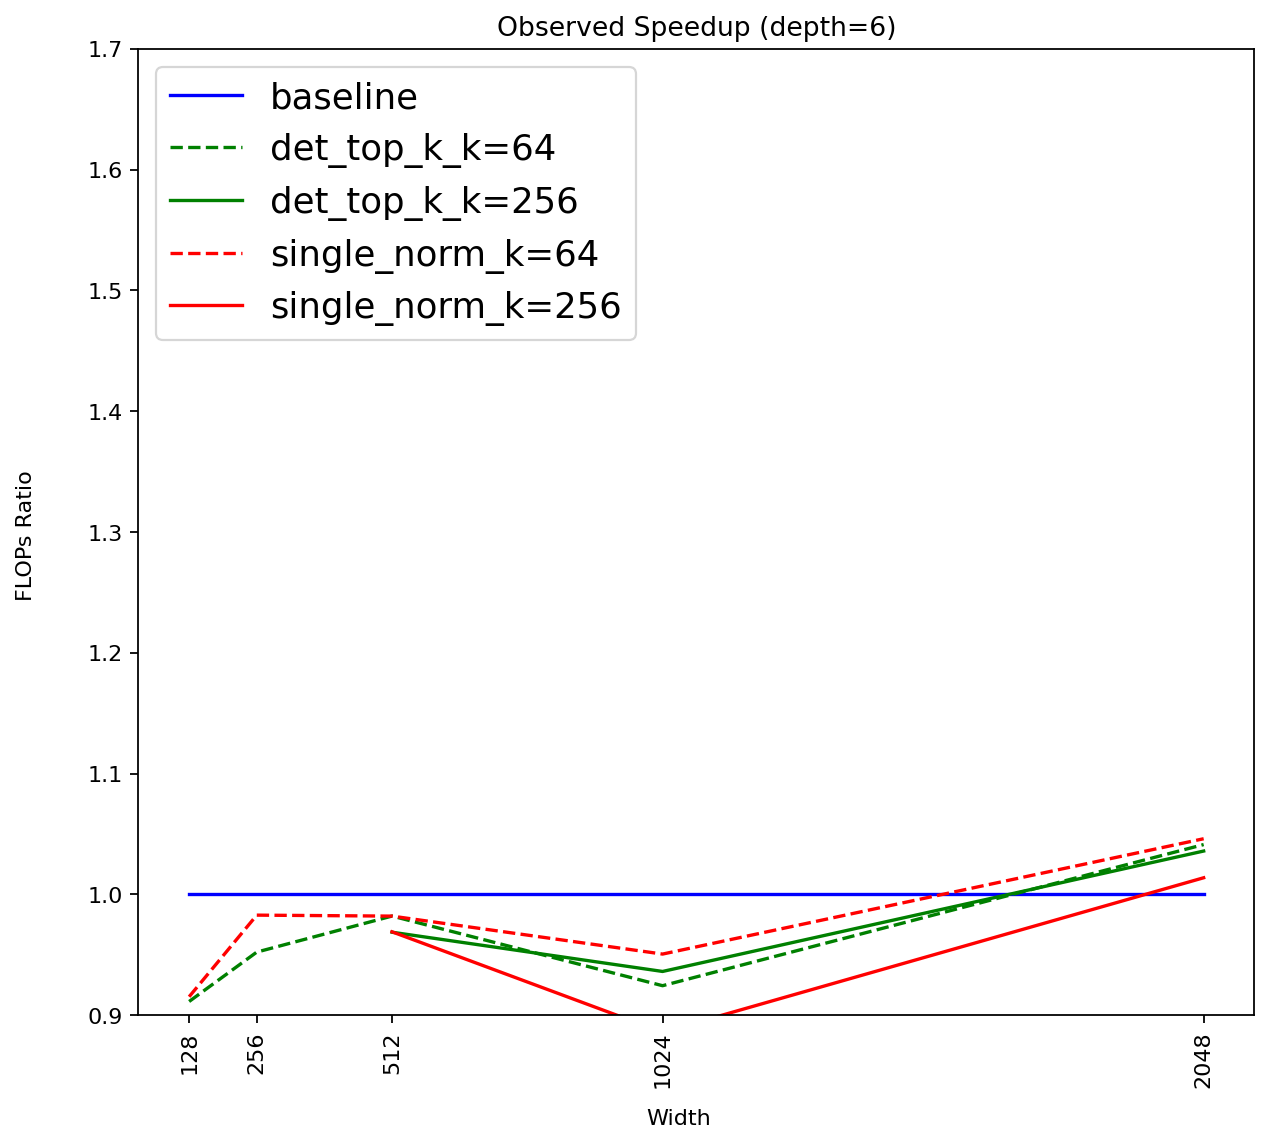

In [289]:


def make_speedup_lineplot(results_and_titles, ax, title='', filter_outlying_baselines=False, LAYER=6):
    baseline_results = results_baseline = results_and_titles['baseline']
    all_layers_baseline = np.unique(results_baseline['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(results_baseline['d_model_encoder_embed_dim'])

    for series_name, experiment_results in results_and_titles.items():

        # all_train_losses = np.zeros((len(all_layers), len(all_widths_experiment)))

        for layer_idx, layer in enumerate([LAYER,]):  # depth
            layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
            layers_slice = experiment_results[experiment_results['n_layers_encoder_layers'] == layer]
            all_widths_experiment_ = np.unique(layers_slice['d_model_encoder_embed_dim'])
            fixed_depth_losses = np.zeros((len(all_widths_experiment_)))

            # all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
            for width_idx, width in enumerate(all_widths_experiment_):  # width
                width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
                width_slice_experiment = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
                
                train_wall_times = np.array([
                    width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                    width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                    width_slice_baseline['epoch_30'],
                ])
                # compute median across 2 trials, 5 measurements/trial
                flat_train_wall_times_ = train_wall_times.flatten()  # filter out nan valeus.
                flat_train_wall_times = flat_train_wall_times_[~np.isnan(flat_train_wall_times_)]
                median_train_wall_time_baseline = np.median(flat_train_wall_times)
                if filter_outlying_baselines and np.any(median_train_wall_time_baseline * 2. > np.min(width_slice_baseline['Median'])):
                    # if the computed baseline is 2x greater than the min-median of the runs
                    # then just reassign the baseline value.
                    median_train_wall_time_baseline = np.min(width_slice_baseline['Median'])
                # This is the 1x multiplier.
                
                # grab the experiment median runtime
                width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
                width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]
                
                ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup

                fixed_depth_losses[width_idx] = np.max(ratio_vs_baseline) if len(ratio_vs_baseline) > 0 else 0

            np.nan_to_num(fixed_depth_losses, copy=False)
            
            # make lineplot
            extra_args = {}
            if series_name == 'baseline':
                #extra_args['linewidth'] = 3.0
                extra_args['color'] = 'b'
            if 'k=64' in series_name:
                # extra_args['marker'] = '*'
                extra_args['linestyle'] = 'dashed'
            if 'single_norm' in series_name:
                extra_args['color'] = 'r'
            if 'det_top_k' in series_name:
                extra_args['color'] = 'g'
            if 'k=256' in series_name:
                fixed_depth_losses[0:1] = 0
            ax.plot(
                all_widths_experiment_[fixed_depth_losses > 0],
                # all_widths_baseline[fixed_depth_losses > 0],  prev
                fixed_depth_losses[fixed_depth_losses > 0],
                label=series_name, **extra_args
            )

    title += '(depth={})'.format(LAYER)
    
    ax.set_title(title)
    ax.set_xticks(ticks=all_widths_baseline)
    ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
    ax.legend(prop={'size': 16})
    return ax, fixed_depth_losses


data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,   
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
}
fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)
make_speedup_lineplot(data, all_ax, title='Observed Speedup ', filter_outlying_baselines=True)
all_ax.legend(loc='upper left', prop={'size': 16})

all_ax.set_ylim(0.9, 1.7)




fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'FLOPs Ratio', va='center', rotation='vertical')


In [286]:
%debug

> <ipython-input-285-4473a4d92fb3>(61)make_speedup_lineplot()
     59                 fixed_depth_losses[0:2] = 0
     60             ax.plot(
---> 61                 all_widths_experiment_[fixed_depth_losses > 0],
     62                 # all_widths_baseline[fixed_depth_losses > 0],
     63                 fixed_depth_losses[fixed_depth_losses > 0],

ipdb> fixed_depth_losses
array([0.        , 0.        , 0.93620977, 1.03589408, 0.        ])
ipdb> quit


Debug the all_widths_baseline_ vs all_widths_baseline. Ended up being the same here.

Text(0.04, 0.5, 'Val BLEU')

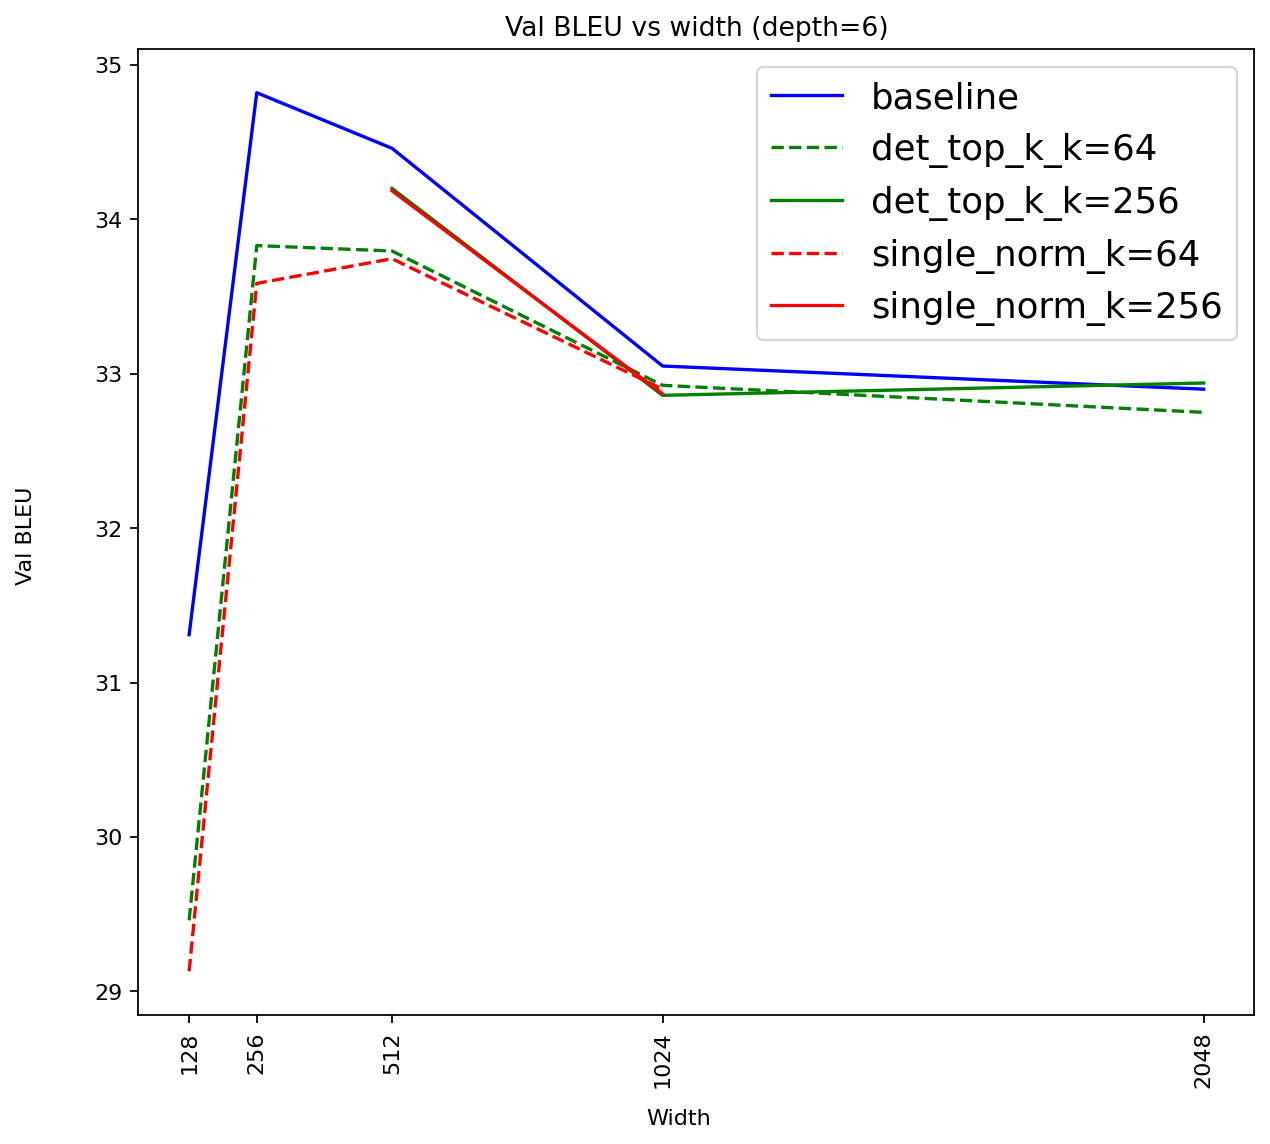

In [295]:
def make_lineplot(results_and_titles, ax, title='', field='BEST_LOSS_TRAIN_EPOCH_1', vmin=None, vmax=None, function=np.min, LAYER=6):
    results_baseline = results_and_titles['baseline']
    all_layers_baseline = np.unique(results_baseline['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(results_baseline['d_model_encoder_embed_dim'])

    # all_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))
    for series_name, results in results_and_titles.items():
        for layer in [LAYER,]:  # depth
            layers_slice_baseline = results[results['n_layers_encoder_layers'] == layer]

            all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
            fixed_depth_losses = np.zeros((len(all_widths_baseline_)))
            # max_width_baseline = max(all_widths_baseline_)
            for width_idx, width in enumerate(all_widths_baseline_):  # width
                width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

                fixed_depth_losses[width_idx] = np.mean(width_slice_baseline[field])

            np.nan_to_num(fixed_depth_losses, copy=False)

            # make lineplot
            extra_args = {}
            if series_name == 'baseline':
                #extra_args['linewidth'] = 3.0
                extra_args['color'] = 'b'
            if 'k=64' in series_name:
                # extra_args['marker'] = '*'
                extra_args['linestyle'] = 'dashed'
            if 'single_norm' in series_name:
                extra_args['color'] = 'r'
            if 'det_top_k' in series_name:
                extra_args['color'] = 'g'
            if 'k=256' in series_name:
                fixed_depth_losses[0] = 0
            ax.plot(
                # all_widths_baseline[fixed_depth_losses > 0],
                all_widths_baseline_[fixed_depth_losses > 0],
                fixed_depth_losses[fixed_depth_losses > 0],
                label=series_name, **extra_args
            )
            # ax.plot(all_widths_baseline_, fixed_depth_losses, )
    # title += '(depth={}), best={:0.2f}'.format(LAYER, globalbest)
    title += '(depth={})'.format(LAYER)
    
    
    ax.set_title(title)
    ax.set_xticks(ticks=all_widths_baseline)
    ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
    ax.legend(prop={'size': 16})
    return ax, fixed_depth_losses


field = 'BEST_BLEU_VAL_EPOCH_120'
# make_lineplot(baseline_results, all_ax[0,0], title='baseline', field='BEST_BLEU_VAL_EPOCH_120', vmin=vmin, vmax=vmax, function=np.max)

data = {
    'baseline': baseline_results,
    'det_top_k_k=64': det_top_k_k_64,
    'det_top_k_k=256': det_top_k_k_256,
    'single_norm_k=64': single_norm_k_64,
    'single_norm_k=256': single_norm_k_256,
}
fig, all_ax = plt.subplots(1, 1, figsize=(9, 8), dpi=160)

result = make_lineplot(data, all_ax, title='Val BLEU vs width ', field=field, vmin=vmin, vmax=vmax, function=np.max)


fig.text(0.5, 0.04, 'Width', ha='center')
fig.text(0.04, 0.5, 'Val BLEU', va='center', rotation='vertical')

